# Springboard - Data Science Career Track

# Capstone Project I: Kiva.org loan delays

In [1]:
# link for the data
kiva_url = "https://www.kaggle.com/lucian18/mpi-on-regions#all_kiva_loans.csv"

### Goal of the project:
    
**Understand what may cause a higher delay between:**

-  the "posted time" (the time at which the loan is posted on Kiva by the field agent)
-  the "funded time" (the time at which the loan posted to Kiva gets 100% funded by lenders)
- the "disbursed time" (the time at which the loan is disbursed by the field agent to the borrower)

#### **The journey of a Kiva loan**

- A borrower applies for a loan.
- The loan goes through the underwriting and approval process
- If it is approved, the loan disbursal period starts
    - The loan is posted to Kiva for lenders to support
    - Fundraising period
    - Fundraising complete (or not)
- Borrower repays the loan
- Lenders use repayments to fund new loans, donate or withdraw the money.

Partner loans are administered by Kiva’s Field Partners and are available to borrowers in more than 80 countries. Direct loans are made using the digital payment system and don’t involve a Field Partner.

**Note**: *Disbursal* refers to when the borrower can access the money, but the timing of it can vary:    
  - For most Field Partner loans, the money is *pre-disbursed* (when partners give the funds out before the loan is posted), so the borrower can access the funds right away. 
  - For direct loans, the money is disbursed only after the loan has been fully crowdfunded on the Kiva website.

### Libraries

In [2]:
%matplotlib inline
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore, normaltest, shapiro, norm, t
from collections import Counter
sns.set()
from scipy import stats
import scipy
import statsmodels.api as sm

## 1) Data inspection and Cleaning

https://github.com/MigBap/Springboard-Capstone-Project-I/blob/master/Capstone%20Project%20I%20--%201)%20Data%20inspection%20and%20Cleaning.ipynb

In [3]:
%%capture
%run "Capstone Project I -- 1) Data inspection and Cleaning.ipynb"

## 2) Exploratory Data Analysis

Now that the data is clean, we want to start by studying the characteristics of the main variables and how they interacted with each other over time.

##### Evolution of the number of loans in each phase: 2006-2017

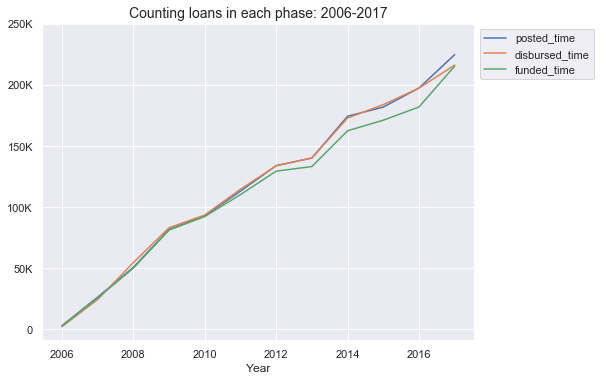

In [4]:
# 2006 - 2017

# main variables
data[data['posted_time'].notnull()]['posted_time'].dt.year.value_counts().sort_index()[:-1].plot(grid=True)
data[data['disbursed_time'].notnull()]['disbursed_time'].dt.year.value_counts().sort_index()[:-1].plot(grid=True)
data[data['funded_time'].notnull()]['funded_time'].dt.year.value_counts().sort_index()[:-1].plot(grid=True)

# formatting
plt.yticks([0, 50000, 100000, 150000, 200000, 250000], ['0', '50K', '100K', '150K', '200K', '250K'])
plt.xlabel("Year")
plt.title("Counting loans in each phase: 2006-2017", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1))
plt.subplots_adjust(left=0, bottom=-0.1, right=1, top=1, wspace=0.6, hspace=0.4)
plt.show()

In a first look, we notice three major time periods:

**Until 2010**, the number of posted loans were closely matched in time by the amount of funding and disbursals. After that, **between 2010 and 2014**, we started to see a clear separation between each of the main variables: it suggests that the loans, continuing with almost always a close match between the posting phase and disbursal, started to lose its efficiency regarding the funding of the projects.  

**After 2014** till the end, the differences continued to aggravate between the postings and funding, and the number of disbursals and postings became just a bit volatile over time. Curiously, the number of funding gained proximity with the number of disbursals, especially in the last year.

Still, this could be related to missing values or other factors, so it deserves further exploration.

**2006-2010**

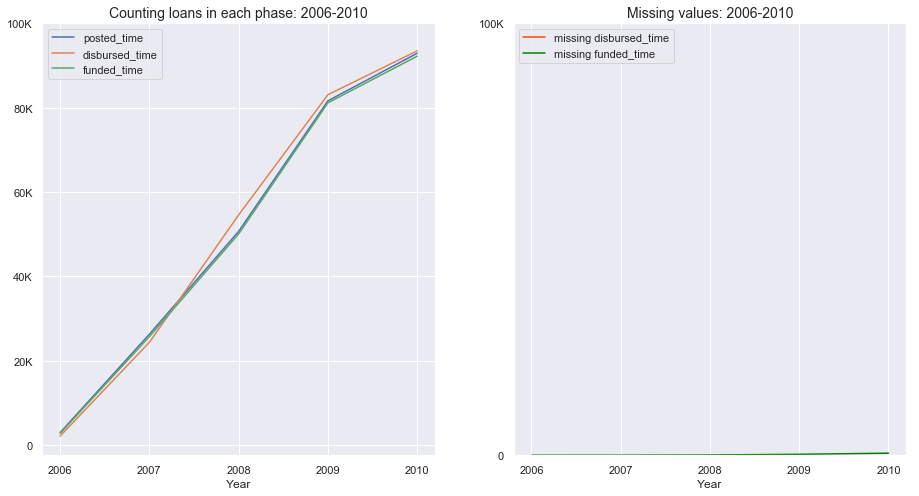

In [5]:
# 2006 - 2010

# main variables
plt.subplot(1, 2, 1)
data[data['posted_time'].notnull()]['posted_time'].dt.year.value_counts().sort_index()[:-8].plot(grid=True)
data[data['disbursed_time'].notnull()]['disbursed_time'].dt.year.value_counts().sort_index()[:-8].plot(grid=True)
data[data['funded_time'].notnull()]['funded_time'].dt.year.value_counts().sort_index()[:-8].plot(grid=True)

# formatting
plt.yticks([0, 20000, 40000, 60000, 80000, 100000], ['0', '20K', '40K', '60K', '80K', '100K'])
plt.locator_params(axis='x', nbins=5)
plt.xlabel("Year")
plt.title("Counting loans in each phase: 2006-2010", fontsize=14)
plt.legend(loc='upper left')


# missing values
plt.subplot(1, 2, 2)
data[data['disbursed_time'].dt.year.isna()]['posted_time'].dt.year.value_counts().sort_index()[:1].plot(grid=True, label="missing disbursed_time", color='orangered')
data[data['funded_time'].dt.year.isna()]['posted_time'].dt.year.value_counts().sort_index()[:5].plot(grid=True, label="missing funded_time", color='green')

# formatting
plt.yticks([0, 100000], ['0', '100K'])
plt.locator_params(axis='x', nbins=5)
plt.xlabel("Year")
plt.title("Missing values: 2006-2010", fontsize=14)
plt.legend(loc='upper left')

plt.subplots_adjust(left=0, bottom=-0.5, right=2, top=1, wspace=0.2, hspace=0.4)
plt.show()

As said before, the process was smooth until 2010.

**2010-2014**

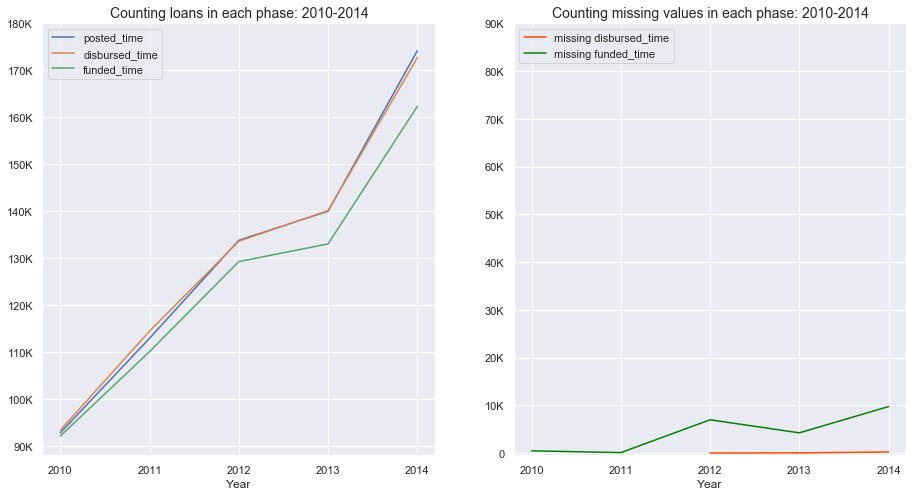

In [6]:
# 2010 - 2014

# main variables
plt.subplot(1, 2, 1)
data[data['posted_time'].notnull()]['posted_time'].dt.year.value_counts().sort_index()[4:9].plot(grid=True)
data[data['disbursed_time'].notnull()]['disbursed_time'].dt.year.value_counts().sort_index()[4:9].plot(grid=True)
data[data['funded_time'].notnull()]['funded_time'].dt.year.value_counts().sort_index()[4:9].plot(grid=True)

# formatting
plt.yticks([90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000], ['90K', '100K', '110K', '120K', '130K', '140K', '150K', '160K', '170K', '180K'])
plt.locator_params(axis='x', nbins=5)
plt.xlabel("Year")
plt.title("Counting loans in each phase: 2010-2014", fontsize=14)
plt.legend(loc= 'upper left')


# missing values
plt.subplot(1, 2, 2)
data[data['disbursed_time'].isna()]['posted_time'].dt.year.value_counts().sort_index()[1:4].plot(grid=True, label="missing disbursed_time", color='orangered')
data[data['funded_time'].isna()]['posted_time'].dt.year.value_counts().sort_index()[4:9].plot(grid=True, label="missing funded_time", color='green')

# formatting
# plt.yticks([0, 2000, 4000, 6000, 8000, 10000], ['0', '2K', '4K', '6K', '8K', '10K'])
# plt.yticks([0, 10000, 20000, 180000], ['0', '10K', '20K', '180K'])
plt.yticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000], ['0', '10K', '20K', '30K', '40K', '50K', '60K', '70K', '80K', '90K'])
plt.locator_params(axis='x', nbins=5)
plt.xlabel("Year")
plt.title("Counting missing values in each phase: 2010-2014", fontsize=14)
plt.legend(loc= 'upper left')

plt.subplots_adjust(left=0, bottom=-0.5, right=2, top=1, wspace=0.2, hspace=0.4)
plt.show()

Between 2010 and 2014, the funding started to lose track of the posted loans mainly between 2010 and 2011. This difference, however, could be due to the cyclical nature of the process, as it will be shown below. Thereafter, the difference was mostly due to the funded missing values.

**2014-2017**

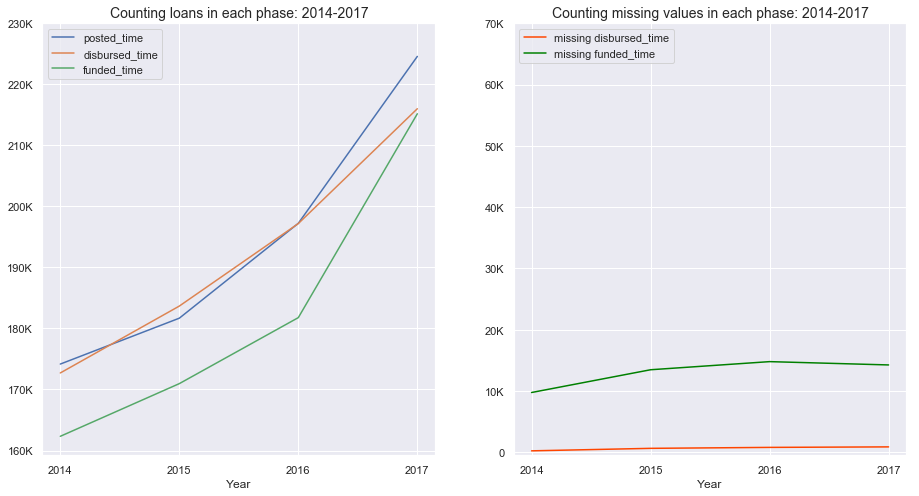

In [7]:
# 2014 - 2017

# main variables 
plt.subplot(1, 2, 1)
data[data['posted_time'].notnull()]['posted_time'].dt.year.value_counts().sort_index()[8:-1].plot(grid=True)
data[data['disbursed_time'].notnull()]['disbursed_time'].dt.year.value_counts().sort_index()[8:-1].plot(grid=True)
data[data['funded_time'].notnull()]['funded_time'].dt.year.value_counts().sort_index()[8:-1].plot(grid=True)

# formatting
plt.yticks([160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000], ['160K', '170K', '180K', '190K', '200K', '210K', '220K', '230K'])
plt.locator_params(axis='x', nbins=5)
# plt.locator_params(axis='y', nbins=5) 
plt.xlabel("Year")
plt.title("Counting loans in each phase: 2014-2017", fontsize=14)
plt.legend(loc= 'upper left')


# missing values
plt.subplot(1, 2, 2)
data[data['disbursed_time'].isna()]['posted_time'].dt.year.value_counts().sort_index()[3:].plot(grid=True, label="missing disbursed_time", color='orangered')
data[data['funded_time'].isna()]['posted_time'].dt.year.value_counts().sort_index()[8:-1].plot(grid=True, label="missing funded_time", color='green')

# formatting
# plt.yticks([0, 4000, 8000, 12000, 16000], ['0', '4K', '8K', '12K', '16K'])
plt.yticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000], ['0', '10K', '20K', '30K', '40K', '50K', '60K', '70K'])
plt.locator_params(axis='x', nbins=5)
plt.xlabel("Year")
plt.title("Counting missing values in each phase: 2014-2017", fontsize=14)
plt.legend(loc= 'upper left')

plt.subplots_adjust(left=0, bottom=-0.5, right=2, top=1, wspace=0.2, hspace=0.4)
plt.show()

In the last phase, although the difference between the number of missing values of the disbursals and fundings remained relatively constant, the number of fundings augmented more than disbursals, equalizing them on the final stretch.

We can see that the deviation increase was mostly due to missing values until 2014. If we take that apart, the lines are somewhat at the same pace. This was not the case during the final 4 years, given the disbursals data we have. However, since it captures data at the end of the scale, and given the cyclical nature of the Kiva process, as shown below, it could still be related to the fact that the disbursal data was not yet inserted, lagging a few days or weeks.

* In **conclusion**, we see that from 2006 till 2010 the process was smooth and without significant delays. The number of loans not funded started then to increase year after year until 2017, ending with approximately 15K loans to fund. This does not means delays got significantly worse year after year, but they're there.

#### The cyclical nature of the Kiva process

When looking at the disaggregation by month, we can see the <font color=green>**cyclical nature**</font>  of the journey of Kiva loans.

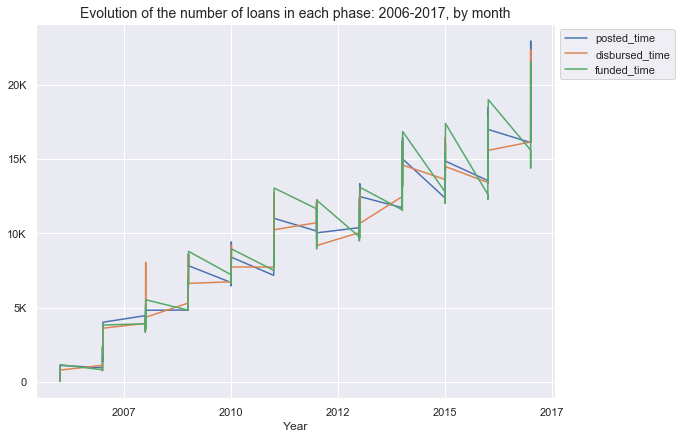

In [8]:
# evolution of the main variables, by month
evol_posted = data[data['posted_time'].notnull()]['posted_time']
evol_disbursed = data[data['disbursed_time'].notnull()]['disbursed_time']
evol_funded = data[data['funded_time'].notnull()]['funded_time']

# plot months (except 2018)
evol_posted.map(lambda x: 1000*x.year + x.month).value_counts().sort_index()[:-2].plot(grid=True)
evol_disbursed.map(lambda x: 1000*x.year + x.month).value_counts().sort_index()[:-4].plot(grid=True)
evol_funded.map(lambda x: 1000*x.year + x.month).value_counts().sort_index()[:-2].plot(grid=True)

plt.locator_params(axis='x', nbins=5)
plt.xticks([2007500, 2010000, 2012500, 2015000, 2017500], ["2007", "2010", "2012", "2015", "2017"])
plt.yticks([0, 5000, 10000, 15000, 20000], ["0", "5K", "10K", "15K", "20K"])
plt.xlabel("Year")
plt.title("Evolution of the number of loans in each phase: 2006-2017, by month", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1))

plt.subplots_adjust(left=0, bottom=-0.3, right=1.2, top=1, wspace=0.6, hspace=0.4)
plt.show()

These cycles suggest that Kiva gather many loan requests before they post on their website. The fundings and disbursals follow the announcements (or, since the disbursal is almost always the first to occur, the posting and funding follow the disbursals).

To further examine this cyclical nature, let us now display the aggregated values by month and finally, by day.

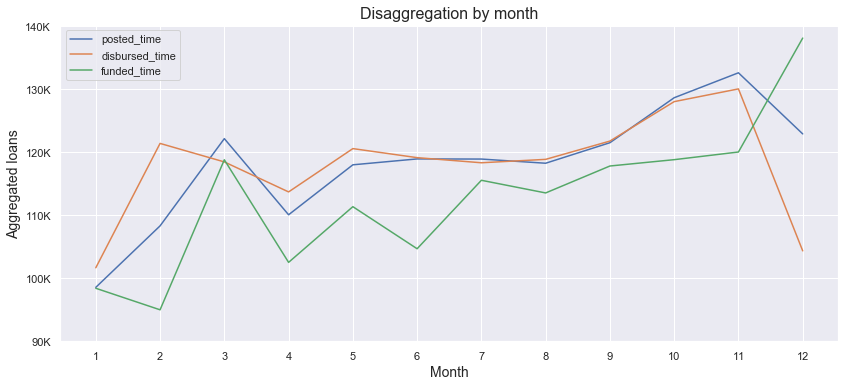

In [9]:
# Display aggregated values, by month

# posted_time
posted_time_months = data['posted_time'].dt.month
posted_time_by_months = data['posted_time'].groupby(posted_time_months).count()
posted_time_by_months.plot()

# disbursed_time
disbursed_time_months = data['disbursed_time'].dt.month
disbursed_time_by_months = data['disbursed_time'].groupby(disbursed_time_months).count()
disbursed_time_by_months.plot()

# funded_time
funded_time_months = data['funded_time'].dt.month
funded_time_by_months = data['funded_time'].groupby(funded_time_months).count()
funded_time_by_months.plot()

plt.subplots_adjust(left=0, bottom=-0.1, right=1.8, top=1, wspace=0.6, hspace=0.4)
plt.title("Disaggregation by month", fontsize=16)
plt.xticks(range(1, 13))
plt.yticks([90000, 100000, 110000, 120000, 130000, 140000], ["90K", "100K", "110K", "120K", "130K", "140K"])
plt.ylabel("Aggregated loans", fontsize=14)
plt.xlabel("Month", fontsize=14)
plt.legend(['posted_time', 'disbursed_time', 'funded_time'])
plt.show()

As we can see, there is a **slight tendency to post, disburse and fund as the year comes to an end**.

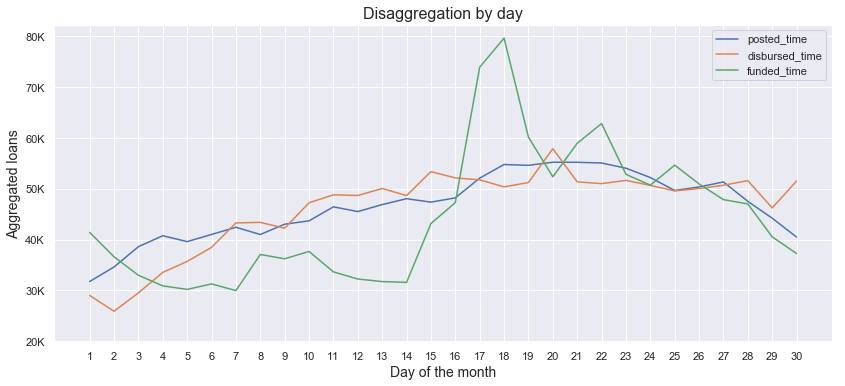

In [10]:
# Display aggregated values, by day

# posted_time
posted_time_days = data['posted_time'].dt.day
posted_time_by_days = data['posted_time'].groupby(posted_time_days).count()
posted_time_by_days.iloc[:-1].plot()

# disbursed_time
disbursed_time_days = data['disbursed_time'].dt.day
disbursed_time_by_days = data['disbursed_time'].groupby(disbursed_time_days).count()
disbursed_time_by_days.iloc[:-1].plot()

# funded_time
funded_time_days = data['funded_time'].dt.day
funded_time_by_days = data['funded_time'].groupby(funded_time_days).count()
funded_time_by_days.iloc[:-1].plot()

plt.subplots_adjust(left=0, bottom=-0.1, right=1.8, top=1, wspace=0.6, hspace=0.4)
plt.title("Disaggregation by day", fontsize=16)
plt.xticks(range(1, 31))
plt.yticks([20000, 30000, 40000, 50000, 60000, 70000, 80000], ["20K", "30K", "40K", "50K", "60K", "70K", "80K"])
plt.ylabel("Aggregated loans", fontsize=14)
plt.xlabel("Day of the month", fontsize=14)
plt.legend(['posted_time', 'disbursed_time', 'funded_time'])
plt.show()

While the posting and disbursing periods relatively aggregate the same amount of loans throughout the month, there is a strong pressure to fund the loans during the **3rd week** of the month.

##### Now, looking at the time differences between the main variables

- **'posted_time' vs 'disbursed_time'**

In [11]:
# posted_time - disbursed_time
post_disb = data['posted_time'] - data['disbursed_time']

In [12]:
post_disb.describe()

count                    1416580
mean     12 days 04:36:06.951143
std      18 days 04:48:11.167029
min          -540 days +02:23:26
25%       5 days 19:58:28.750000
50%             14 days 02:57:52
75%      25 days 02:15:43.500000
max            118 days 16:28:59
dtype: object

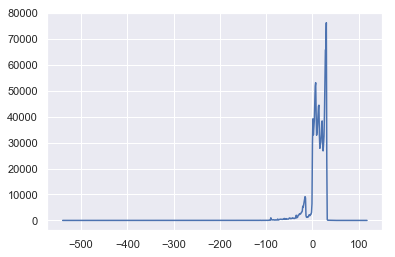

In [13]:
# Glimpse of the distribution
post_disb.dt.days.value_counts().sort_index().plot()

In [14]:
# difference between disbursal and posting between -35 and +32 days, in percentage
print("Between -35 and +32 days:", int(round(post_disb.dt.days.value_counts().sort_index()[-35:32].sum() / 
                                             post_disb.dt.days.value_counts().sum()*100)), "%")

# difference between disbursal and posting between 0 and +32 days, in percentage
print("Between 0 and +32 days:", int(round(post_disb.dt.days.value_counts().sort_index()[0:32].sum() / 
                                           post_disb.dt.days.value_counts().sum()*100)), "%")

Between -35 and +32 days: 98 %
Between 0 and +32 days: 90 %


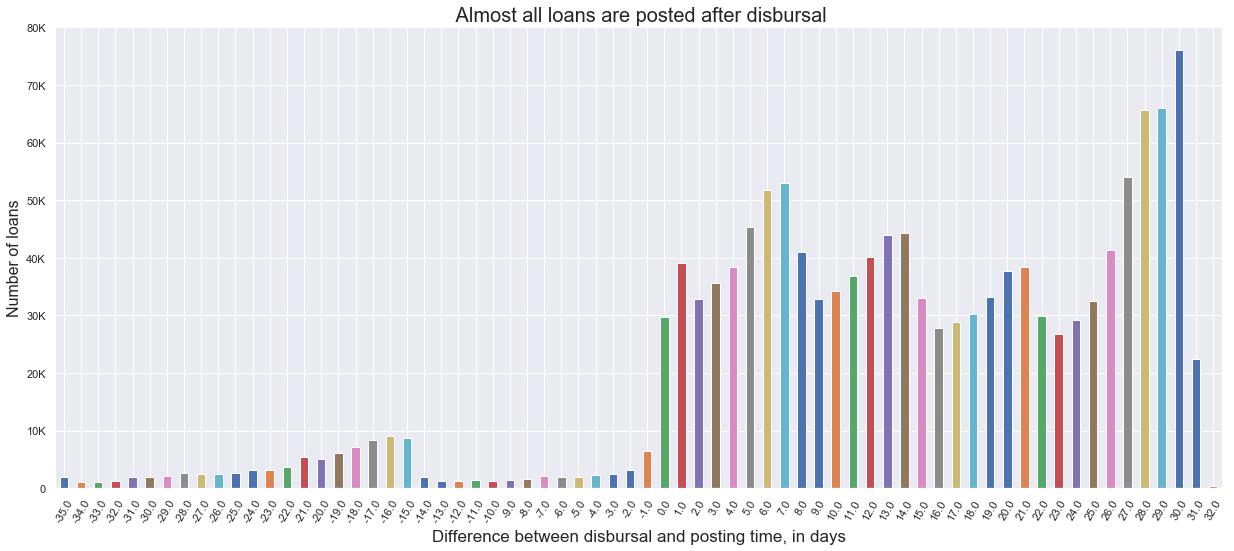

In [15]:
# distribution of 98% of the selected data
post_disb.dt.days.value_counts().sort_index()[-35:32].plot(kind='bar')

# formatting
plt.title(" Almost all loans are posted after disbursal", fontsize=20)
plt.xticks(rotation=60)
plt.xlabel("Difference between disbursal and posting time, in days", fontsize=17)
plt.ylabel("Number of loans", fontsize=16)
plt.yticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000], 
           ['0', '10K', '20K', '30K', '40K', '50K', '60K', '70K', '80K'])

plt.subplots_adjust(left=0, bottom=-0.6, right=2.7, top=1, wspace=0.6, hspace=0.4)
plt.show()

- **98% of the differences between the time of disbursal and posting of loans occur on a range of -35 days and +32 days**.


- Moreover, **90% of the differences are positive**, that is, pre-disbursals.

As we can confirm, most (at least 90%) of the disbursals are made by field partners, the only ones who can pre-disburse.

- **'posted_time' vs 'funded_time'**

In [16]:
# funded_time - posted_time
fund_post = data['funded_time'] - data['posted_time']

In [17]:
fund_post.describe()

count                    1354847
mean     12 days 14:55:24.936868
std      13 days 11:14:07.002439
min              0 days 00:02:00
25%       3 days 13:14:12.500000
50%              7 days 18:27:30
75%      18 days 11:31:19.500000
max            533 days 17:22:00
dtype: object

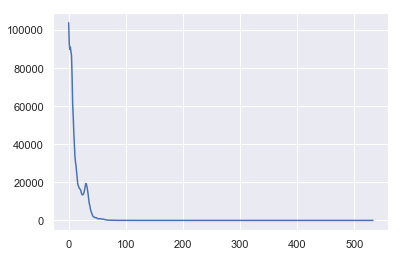

In [18]:
# Glimpse of the distribution
fund_post.dt.days.value_counts().sort_index().plot()

In [19]:
# difference between funding and posting between 0 and +50 days, in percentage
print("Between 0 and +50 days:", int(round(fund_post.dt.days.value_counts().sort_index()[0:50].sum() /
                                           fund_post.dt.days.value_counts().sum()*100)), "%")

# difference between funding and posting between 0 and +30 days, in percentage
print("Between 0 and +30 days:", int(round(fund_post.dt.days.value_counts().sort_index()[0:30].sum() /
                                           fund_post.dt.days.value_counts().sum()*100)), "%")

Between 0 and +50 days: 99 %
Between 0 and +30 days: 89 %


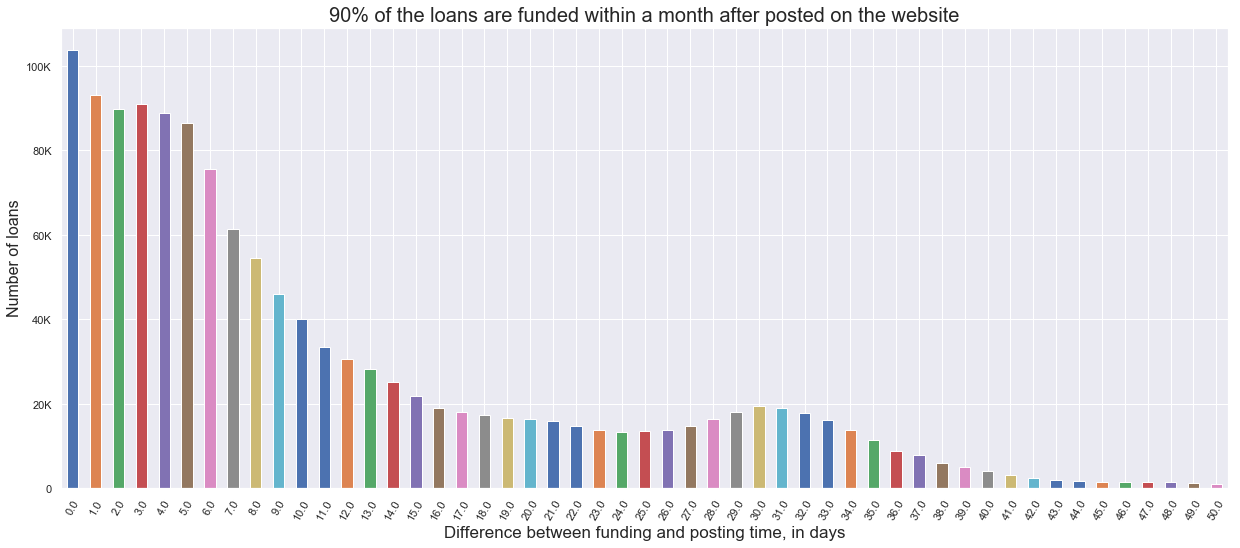

In [20]:
# distribution of 99% of the selected data
fund_post.dt.days.value_counts().sort_index()[0:50].plot(kind='bar')

# formatting
plt.title("90% of the loans are funded within a month after posted on the website", fontsize=20)
plt.xticks(rotation=60)
plt.xlabel("Difference between funding and posting time, in days", fontsize=17)
plt.ylabel("Number of loans", fontsize=16)
plt.yticks([0, 20000, 40000, 60000, 80000, 100000], ['0', '20K', '40K','60K', '80K', '100K'])

plt.subplots_adjust(left=0, bottom=-0.6, right=2.7, top=1, wspace=0.6, hspace=0.4)
plt.show()

When we look at the time a loan takes to get funded **since the time it is posted on Kiva website**, we see that **99% of them are funded within 50 days, and almost 90% within 30 days**.

This barplot suggests that the time between posting and funding could be described as an Exponential distribution. I will create an Empirical CDF of these time differences and compare it with a theoretical CDF.

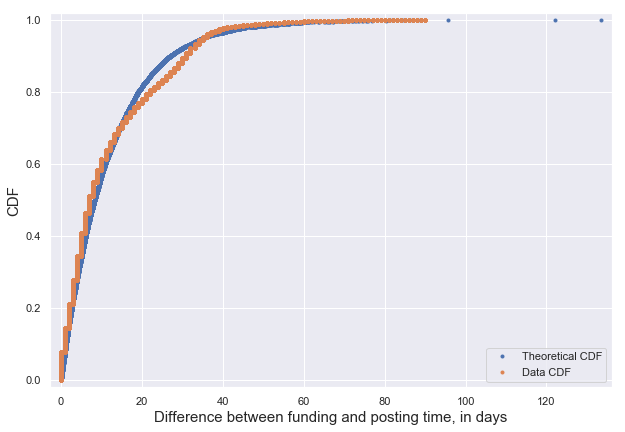

In [21]:
# ECDF function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

# time differences between funding and posting times array
fund_post_array = fund_post.dt.days

# within 90 days (99%)
fund_post_array_90 = fund_post_array[fund_post_array.between(0, 90)]


# ECDF from the data: x, y
x, y = ecdf(fund_post_array_90)

# Drawing an exponential distribution with parameter tau
tau = np.mean(fund_post_array_90)
theor = np.random.exponential(tau, 10000)

# constructing the CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(theor)

# Overlaying the plots
plt.plot(x_theor, y_theor, marker='.', linestyle='none')
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel("Difference between funding and posting time, in days", fontsize=15)
plt.ylabel('CDF', fontsize=15)
plt.legend(('Theoretical CDF', 'Data CDF'), loc='lower right')

# Show the plot
plt.subplots_adjust(left=0, bottom=-0.3, right=1.3, top=1, wspace=0, hspace=0)
plt.show()

It seems to fit an exponential distribution.

- **'disbursed_time' vs 'funded_time'**

Now, since we know that most of the loans are pre-disbursed, we should now take a look at the combination of the two previous analysis, that is, at the difference between the time of disbursal and funding. 

In [22]:
# funded_time - disbursed_time
fund_disb = data['funded_time'] - data['disbursed_time']

In [23]:
fund_disb.describe()

count                    1354847
mean     24 days 16:56:53.510973
std      19 days 18:17:54.516253
min          -183 days +15:28:03
25%      13 days 08:16:07.500000
50%             26 days 03:41:37
75%             36 days 08:18:57
max            157 days 06:55:22
dtype: object

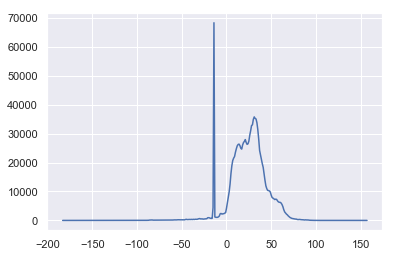

In [24]:
# Glimpse of the distribution
fund_disb.dt.days.value_counts().sort_index().plot()

In [25]:
# difference between funding and disbursal between -18 and +70 days
print("between -18 and +70 days:", int(round(fund_disb.dt.days.value_counts().sort_index()[-18:70].sum()/
                                             fund_disb.dt.days.value_counts().sum()*100)), "%")

# when the disbursal occurs only after the funding is complete
print("disbursal after funding:", int(round(fund_disb.dt.days.value_counts().sort_index()[-3000:0].sum()/
                                            fund_disb.dt.days.value_counts().sum()*100)), "%")

# when the disbursal occurs until 14 days after the loan is funded
print("disbursal after funding (until 14 days):", int(round(fund_disb.dt.days.value_counts().sort_index()[-14:0].sum()/
                                                            fund_disb.dt.days.value_counts().sum()*100)), "%")

# when the disbursal occurs 14 days after the loan is funded
print("disbursal after funding (14th day):", int(round(fund_disb.dt.days.value_counts().sort_index()[-14].sum()/
                                                       fund_disb.dt.days.value_counts().sum()*100)), "%")

between -18 and +70 days: 98 %
disbursal after funding: 9 %
disbursal after funding (until 14 days): 7 %
disbursal after funding (14th day): 5 %


In [26]:
# difference between funding and disbursal between 0 and +30 days
print(int(round(fund_disb.dt.days.value_counts().sort_index()[0:30].sum()/
                fund_disb.dt.days.value_counts().sum()*100)))

# difference between funding and disbursal between 0 and +60 days
print(int(round(fund_disb.dt.days.value_counts().sort_index()[0:60].sum()/
                fund_disb.dt.days.value_counts().sum()*100)))

53
88


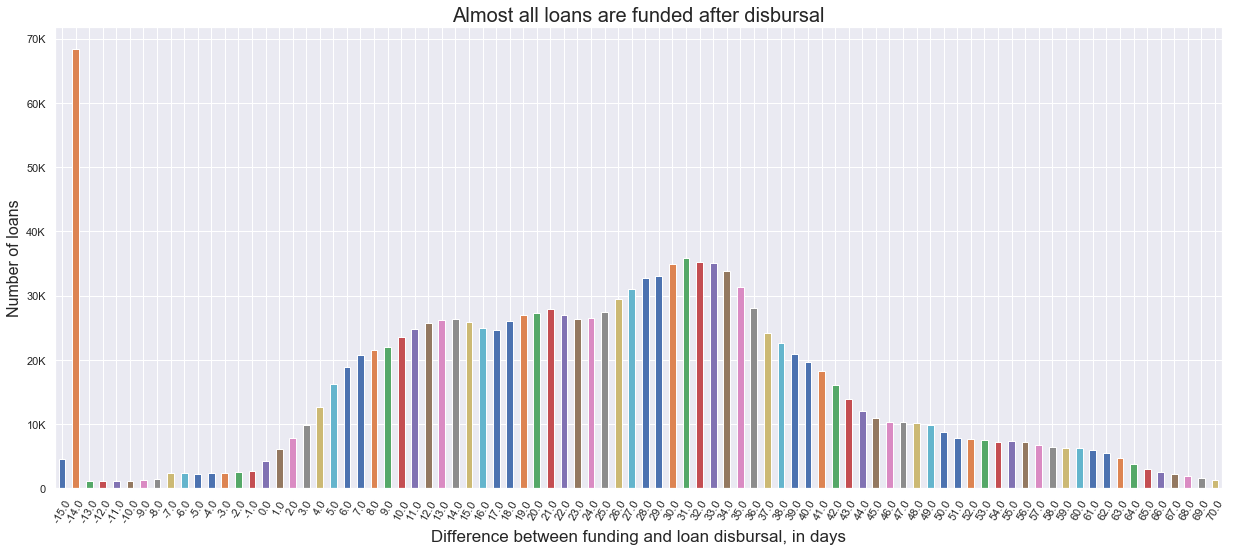

In [27]:
# distribution of 98% of the total data
fund_disb.dt.days.value_counts().sort_index()[-15:70].plot(kind='bar')

# formatting
plt.title("Almost all loans are funded after disbursal", fontsize=20)
plt.xticks(rotation=60)
plt.xlabel("Difference between funding and loan disbursal, in days", fontsize=17)
plt.ylabel("Number of loans", fontsize=16)
plt.yticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000], ['0', '10K', '20K', '30K', '40K', '50K', '60K', '70K'])

plt.subplots_adjust(left=0, bottom=-0.6, right=2.7, top=1, wspace=0.6, hspace=0.4)
plt.show()

As we can see, close to **10% of the total loans are disbursed after the funding is complete**, and 5% occur 14 days after the time of funding.

In most cases, a pre-disbursal occurs and only then the funding period commences.

Confirming if the 5% cases where disbursal occurs 14 days after funding are distributed over time or concentrated in a few occasions:

In [28]:
# when disbursal occurs 14 days after funding time
forteen_days = data[(data['funded_time'] - data['disbursed_time']).dt.days == -14]['funded_time']

# in how many months this occurs
forteen_days.map(lambda x: 1000*x.year + x.month).value_counts().sort_index().count()

127

It is regular over time, suggesting, again, the cyclical nature of the loan process.

**Real time to fund**

- Since this analysis includes cases where the disbursal occurs after the posting time, now we will look at **the real time a loan takes to get funded**. To do that, we need the difference between the funding time and the disbursal or posting time, depending on which of these occurred first.

In [29]:
# total differences
start_1 = data[data['posted_time'] < data['disbursed_time']]
start_2 = data[data['posted_time'] > data['disbursed_time']]

# loan time 1 & 2
loan_time_1 = start_1['funded_time'] - start_1['posted_time']
loan_time_2 = start_2['funded_time'] - start_2['disbursed_time']

#concatenate
loan_time = pd.concat([loan_time_1.dt.days, loan_time_2.dt.days], axis=0)

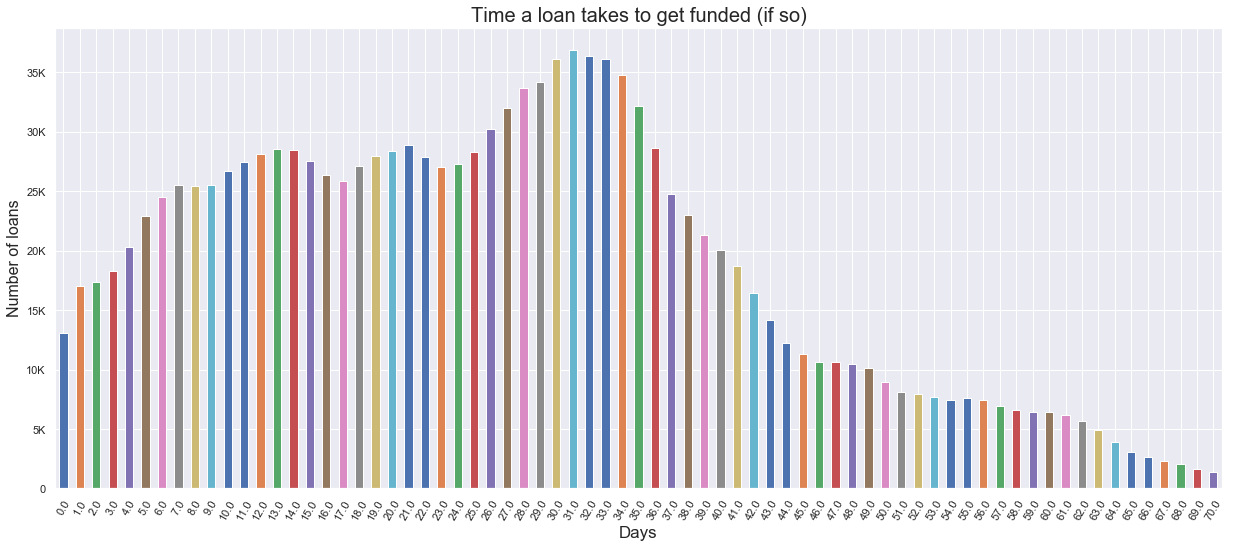

In [30]:
# 99% of the data
loan_time_99 = loan_time.value_counts().sort_index()[0:70]

# distribution
loan_time_99.plot(kind='bar')

# formatting
plt.title("Time a loan takes to get funded (if so)", fontsize=20)
plt.xticks(rotation=60)
plt.xlabel("Days", fontsize=17)
plt.ylabel("Number of loans", fontsize=16)
plt.yticks([0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], ['0', '5K', '10K','15K', '20K', '25K', '30K', '35K'])

plt.subplots_adjust(left=0, bottom=-0.6, right=2.7, top=1, wspace=0.6, hspace=0.4)
plt.show()

In [31]:
# percentage of loans that get funded within a month
print("1 month:", int(round(loan_time.value_counts().sort_index()[0:30].sum()/loan_time.value_counts().sum()*100)), "%")

# percentage of loans that get funded within 2 months and 10 days
print("70 days:", int(round(loan_time.value_counts().sort_index()[0:70].sum()/loan_time.value_counts().sum()*100)), "%")

1 month: 60 %
70 days: 99 %


In [32]:
# loans not funded yet
print(round(data[(data['posted_time'].notnull()) & (data['funded_time'].isnull())].count().loan_id/data.posted_time.count()*100), "%")

5.0 %


5% of all loans are not funded yet. Of those that are:

- <font color=green>**Close to 60% are funded within a month.**</font> This happens almost in a linear way as the month advances.
- <font color=green>**99% are funded within 2 months and 10 days.**</font>

As a reminder, 9% of the total loans are only disbursed after they are funded (with 7% within two weeks).

##### Is it a normal distribution?

In [33]:
# represented data
rep_loan = loan_time[loan_time.between(0, 70)]

# D'Agostino's K-squared test
stat, p_value = normaltest(rep_loan)
print("D'Agostino's K-squared test: statistic=%.3f; p-value=%.3f" % (stat, p_value))

D'Agostino's K-squared test: statistic=46105.594; p-value=0.000


Assuming a significance level of 1%, we have sufficient statistical evidence to reject the hypothesis that assumes that the time a loan takes to get funded follows a normal distribution.

ECDF:

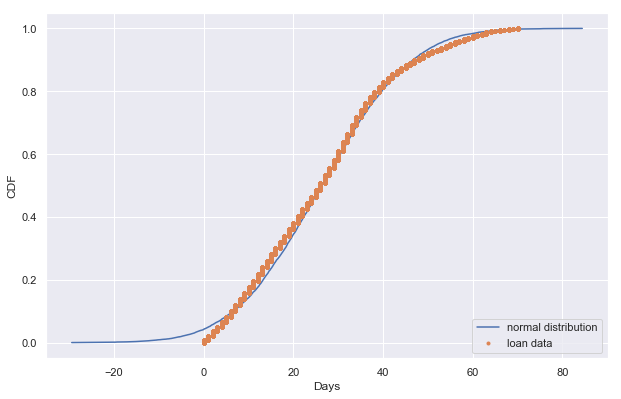

In [34]:
# ECDF

# mean and standard deviation of the data
mean_loan_time = np.mean(rep_loan)
std_loan_time = np.std(rep_loan)

# 10,000 samples out of a normal distribution with mean_temp and std_temp
samples = np.random.normal(mean_loan_time, std_loan_time, size=10000)

# CDF of the samples and of the temperature data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(rep_loan)

# Plot
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.legend(('normal distribution', 'loan data'), loc='lower right')
plt.xlabel('Days')
plt.ylabel('CDF')

plt.subplots_adjust(left=0, bottom=-0.2, right=1.3, top=1, wspace=0, hspace=0)
plt.show()

When comparing the CDFs, however, they seem close. The hypothesis test made above considered negative values.

<font color=green>**General characteristics:**</font>

In [35]:
# all data
print(loan_time.describe().apply(lambda x: format(x, 'f')))

count    1354847.000000
mean          26.995140
std           16.891946
min            0.000000
25%           14.000000
50%           26.000000
75%           36.000000
max          533.000000
dtype: object


*Assuming the normality of the data*, we can build a 95% confidence interval for the average time to fund a loan:

In [36]:
# margin of error 
margin_error = stats.norm.ppf(0.975) * np.std(loan_time)  

# 95% confidence interval
c_interval_left = np.mean(loan_time) - margin_error
c_interval_right = np.mean(loan_time) + margin_error

print("confidence interval: [", c_interval_left, ",", c_interval_right, "]")

confidence interval: [ -6.112453985619258 , 60.10273480699614 ]


We can be 95% confident that a loan is funded within 2 months, on average, but this statistic does not help a lot. Let us see for the standard deviation:

In [37]:
# Generate bootstrap replicate
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data))) 

# Generate bootstrap replicates
def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for i in range(size)])

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


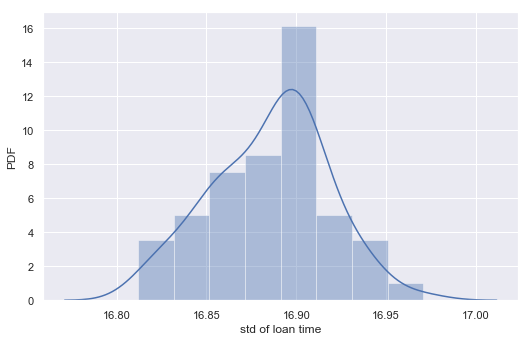

In [38]:
# Generate 100 bootstrap replicates of the *std*: bs_replicates
bs_replicates = draw_bs_reps(loan_time.dropna(), np.std, 100)

# histogram of the results
sns.distplot(bs_replicates)
plt.xlabel('std of loan time')
plt.ylabel('PDF')

# plot
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.show()

As we can see, it is not normally distributed.

In [39]:
print("\n95% confidence interval for the std of loan_time:", np.percentile(bs_replicates, [2.5, 97.5]))


95% confidence interval for the std of loan_time: [16.82342098 16.94055705]


#####  **What may cause delays, then?**

##### Do countries have influence regarding delays?

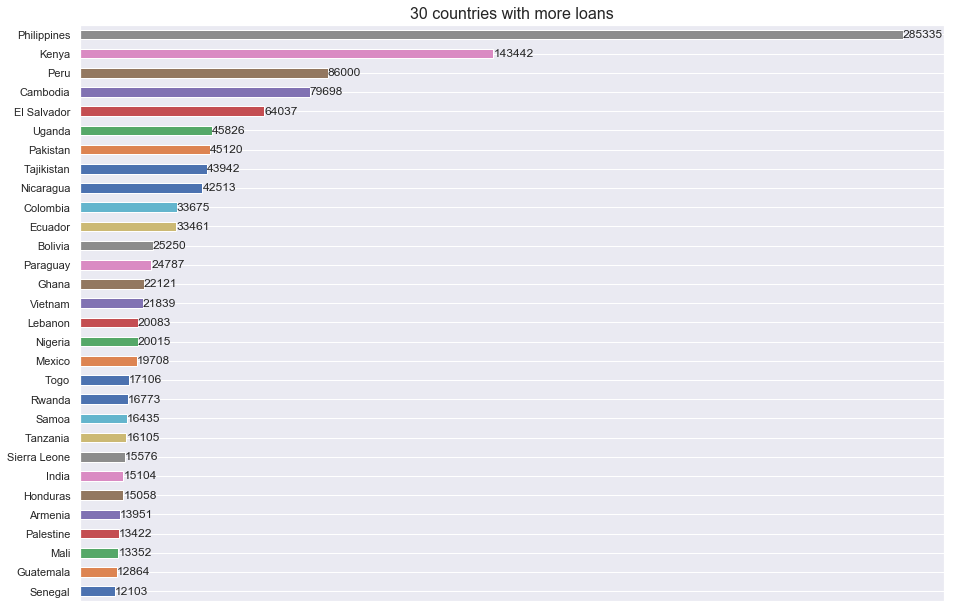

In [40]:
# Distribution of loans across countries

country_loans = data['country_name'].value_counts(ascending=True)[-30:]
country_loans_idx = data['country_name'].value_counts().index
pos = np.arange(len(country_loans))

# add the values to the side of each bar
for p, cidx, cl in zip(pos, country_loans_idx, country_loans):
    plt.annotate(cl, xy=(cl, p), va='center')

# formatting
plt.xticks([])
plt.title("30 countries with more loans", fontsize=16)
plt.subplots_adjust(left=0, bottom=-1, right=2, top=1, wspace=0, hspace=0.6)

country_loans.plot(kind='barh')
plt.show()

In [41]:
# 6 countries with more loan requests
print(data['country_name'].value_counts()[0:6])

# percentagewise
print(round(data['country_name'].value_counts()[0:6].sum()/data['country_name'].value_counts().sum()*100))

Philippines    285335
Kenya          143442
Peru            86000
Cambodia        79698
El Salvador     64037
Uganda          45826
Name: country_name, dtype: int64
50.0


**50% of the loans go to 6 countries:** *Philippines, Kenya, Peru, Cambodia, El Salvador and Uganda*.

In [42]:
# 20 countries with more loan requests
print(data['country_name'].value_counts()[0:20])

# percentagewise
print(round(data['country_name'].value_counts()[0:20].sum()/data['country_name'].value_counts().sum()*100))

Philippines    285335
Kenya          143442
Peru            86000
Cambodia        79698
El Salvador     64037
Uganda          45826
Pakistan        45120
Tajikistan      43942
Nicaragua       42513
Colombia        33675
Ecuador         33461
Bolivia         25250
Paraguay        24787
Ghana           22121
Vietnam         21839
Lebanon         20083
Nigeria         20015
Mexico          19708
Togo            17106
Rwanda          16773
Name: country_name, dtype: int64
77.0


**77% of the loans go to 20 countries.**

**How is the distribution of the time to fund for each of the main 6 countries?**

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


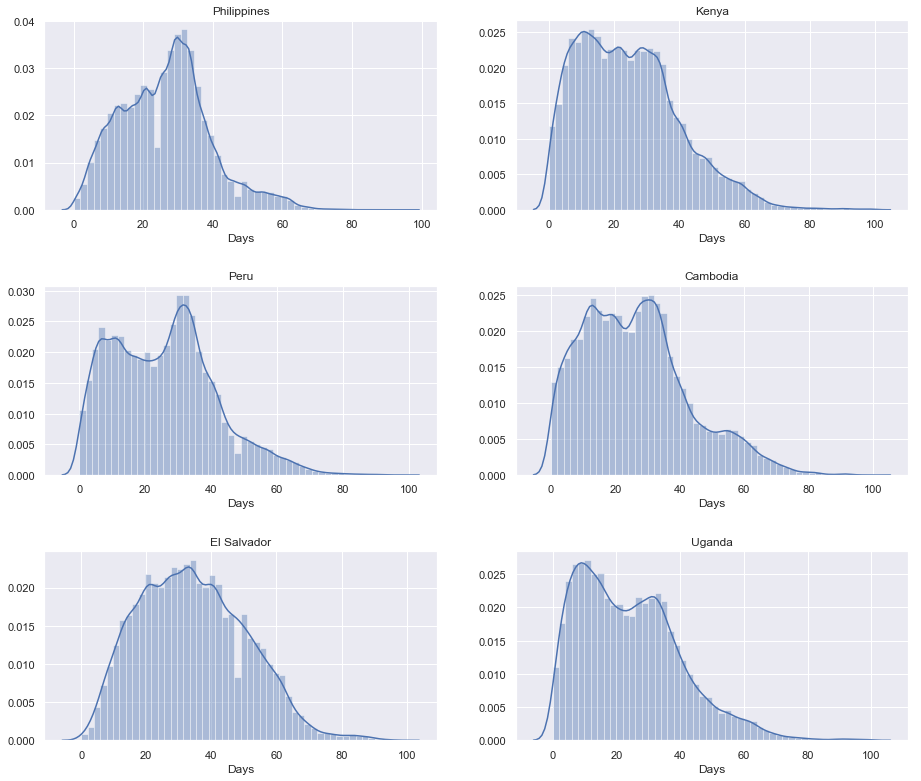

In [43]:
# Prepare dataset

# total differences
start_1 = data[data['posted_time'] < data['disbursed_time']]
start_2 = data[data['posted_time'] > data['disbursed_time']]

# select data
data_2 = pd.concat([start_1, start_2], axis=0)
data_2 = data_2.set_index('country_name')

# total differences
start_1_countries = data_2[data_2['posted_time'] < data_2['disbursed_time']]
start_2_countries = data_2[data_2['posted_time'] > data_2['disbursed_time']]

# loan_time_countries 1 & 2
loan_time_1_countries = start_1_countries['funded_time'] - start_1_countries['posted_time']
loan_time_2_countries = start_2_countries['funded_time'] - start_2_countries['disbursed_time']

#concatenate
loan_time_countries = pd.concat([loan_time_1_countries.dt.days, loan_time_2_countries.dt.days], axis=0)

##############################

# countries time to fund
countries_6_list = ['Philippines', 'Kenya', 'Peru', 'Cambodia', 'El Salvador', 'Uganda']
countries_6 = {}

for i in countries_6_list:
    countries_6[i] = loan_time_countries.loc[i]
    countries_6[i] = countries_6[i][countries_6[i].between(0, 100)]
    
# plots
for i, country in enumerate(countries_6_list):
    plt.subplot(3, 2, i + 1)
    sns.distplot(countries_6[country])
    plt.title(country)
    plt.xlabel("Days")

plt.subplots_adjust(left=0, bottom=-1.5, right=2, top=1, wspace=0.2, hspace=0.4)
plt.show()

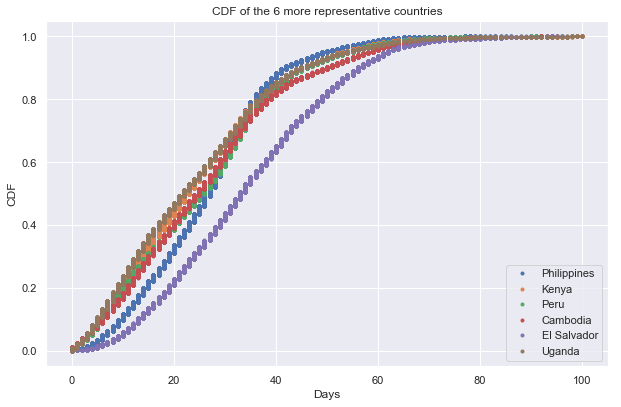

In [44]:
# ECDF's

for country in countries_6_list:
    x, y = ecdf(countries_6[country])
    plt.plot(x, y, marker='.', linestyle='none')

plt.legend(countries_6_list, loc='lower right')
plt.xlabel('Days')
plt.ylabel('CDF')
plt.title("CDF of the 6 more representative countries")
plt.subplots_adjust(left=0, bottom=-0.2, right=1.3, top=1, wspace=0, hspace=0)
plt.show()

We clearly distinguish El Salvador from the other ones. It might be useful in further analysis. El Salvador takes 5% of the loans. The Philippines (20%) could also be a motive for further analysis.

#####  When a loan is funded (96% of the data), how long does it take to get that funding, on average, in each country? Does the number of loans they have have any impact?

In [45]:
# redefine country_loans: include all
country_loans = data['country_name'].value_counts(ascending=True)

#concatenate
loan_time_amounts = pd.concat([start_1_countries.loan_amount, start_2_countries.loan_amount], axis=0)

# create list of countries and respective mean time of loan funding
countries_nr_loans = []
avg_time_fund = []
size_loans = []

for i in range(country_loans.count()):
    if country_loans.index[i] in loan_time_countries.index:
        countries_nr_loans.append(country_loans[i])
        avg_time_fund.append(round(loan_time_countries.loc[country_loans.index[i]].mean()))
        size_loans.append(round(loan_time_amounts.loc[country_loans.index[i]].mean())/10)

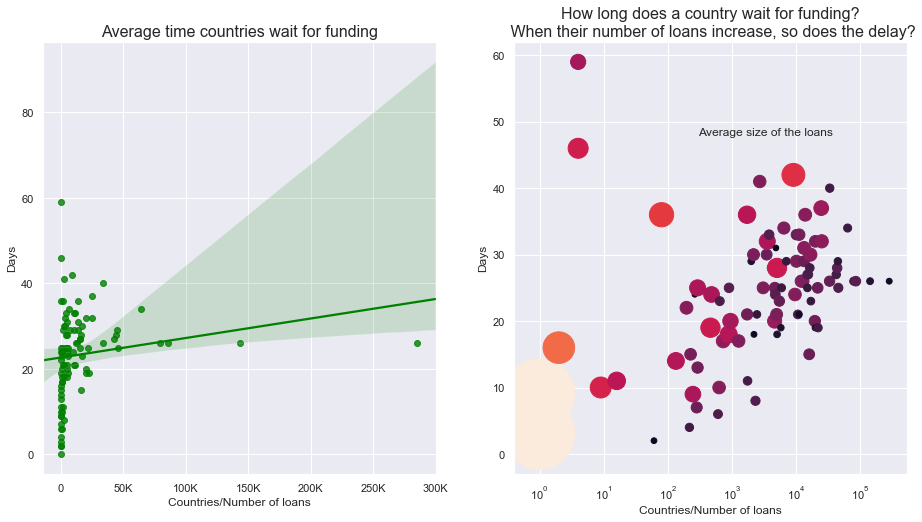

In [46]:
# create dataframe
loan_increase_time = pd.DataFrame({'countries_nr_loans': countries_nr_loans, 'avg_time_fund': avg_time_fund, 
                                   'size_loans': size_loans})

# scatter plot
plt.subplot(1, 2, 1)
# plt.scatter(countries_nr_loans, avg_time_fund)
sns.regplot(x='countries_nr_loans', y='avg_time_fund', data=loan_increase_time, color="green")
plt.title("Average time countries wait for funding", fontsize=16)
plt.xticks([0, 50000, 100000, 150000, 200000, 250000, 300000], ['0', '50K', '100K', '150K', '200K', '250K', '300K'])
plt.xlabel("Countries/Number of loans")
plt.ylabel("Days")

# scatter plot - log
plt.subplot(1, 2, 2)
plt.scatter(countries_nr_loans, avg_time_fund, s=size_loans, c=np.log10(size_loans))   
# sns.regplot(x='countries_nr_loans', y='avg_time_fund', data=loan_increase_time)
plt.text(300, 48, 'Average size of the loans')

# formatting
plt.title("How long does a country wait for funding?\n When their number of loans increase, so does the delay?", fontsize=16)
plt.xlabel("Countries/Number of loans")
plt.ylabel("Days")
plt.xscale('log') 

# plt.subplots_adjust(left=0, bottom=-0.1, right=1, top=1, wspace=0.6, hspace=0.4)
plt.subplots_adjust(left=0, bottom=-0.5, right=2, top=1, wspace=0.2, hspace=0.4)
plt.show()

For countries with a few number of loans, the variation of average time to get the funding is significant. As soon as the number of loans start to increase, the average number of days to get the funding rapidly get close to 30, where most of them reside. 
* It seems to be that as the number of loans increases in a country, with all the remaining variables constant, so does the delay for funding a loan.

In [47]:
# pearson correlation coefficient formula
def pearson_r(data_1, data_2):
    return np.corrcoef(data_1, data_2)[0, 1]

# observed correlation coefficient
obs_corr = pearson_r(countries_nr_loans, avg_time_fund)

print("Correlation between the number of loans and time to fund:", obs_corr)

Correlation between the number of loans and time to fund: 0.1566123458219207


Is this positive **correlation between the number of loans and time to fund significant**? I will test this assuming that there is 0 correlation between the 2 variables, leaving the time variable fixed while permuting 'countries_nr_loans'.

In [48]:
# 10000 permutations
perm_replicates = np.empty(10000)

for i in range(len(perm_replicates)):
    x_permuted = np.random.permutation(countries_nr_loans)
    perm_replicates[i] = pearson_r(x_permuted, avg_time_fund)

# p-value
p_value = np.sum(perm_replicates >= obs_corr) / len(perm_replicates)

print("p-value:", p_value)

p-value: 0.0576


Considering a significance level of 5%, we fail to reject the hypothesis that the 2 variables are independent of each other. Given this result, however, other factors such as the characteristics of each country loan could be more influential, but we will keep this in mind.

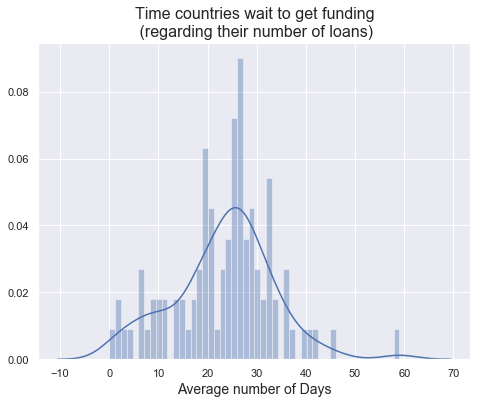

In [49]:
# histogram of the average number of days a country waits to get funding
sns.distplot(avg_time_fund, bins=50)

# formatting
plt.xlabel("Average number of Days", fontsize=14)
plt.title("Time countries wait to get funding\n (regarding their number of loans)", fontsize=16)

plt.subplots_adjust(left=0, bottom=-0.1, right=1, top=1, wspace=0.6, hspace=0.4)
plt.show()

Here is the distribution of the time each country waits to get funding, which was suggested on the previous display. Here, the **normal distribution** seems to fit.

In [50]:
# D'Agostino's K-squared test
stat, p_value = normaltest(avg_time_fund)
print("D'Agostino's K-squared test: statistic=%.3f; p-value=%.3f" % (stat, p_value))

D'Agostino's K-squared test: statistic=2.865; p-value=0.239


We can now see **which countries have more impact on the delay** on average and maybe get hints why.

In [51]:
# adapt index
adapt_index = list(country_loans.index)
adapt_index.remove('Virgin Islands')

# identify country and set index
loan_increase_time['country'] = adapt_index
loan_increase_time = loan_increase_time.set_index('country')

# countries with an average time to fund loans > 30
more_time = loan_increase_time.sort_values('avg_time_fund', ascending=False)
more_time_30 = more_time[more_time['avg_time_fund'] >= 30]
more_time_30

,countries_nr_loans,avg_time_fund,size_loans
country,,,
Vanuatu,4,59.0,231.2
Guam,4,46.0,400.0
United States,9125,42.0,525.3
Myanmar (Burma),2724,41.0,154.2
Colombia,33675,40.0,70.1
Paraguay,24787,37.0,217.7
Armenia,13951,36.0,164.5
Burundi,1727,36.0,303.0
Puerto Rico,80,36.0,588.3


In [52]:
# number of countries with a delay >= 30
print("number of countries with a delay higher than 30 days:", more_time_30.avg_time_fund.count())

# percentage of loans
print("% of total loans:", round(more_time_30['countries_nr_loans'].sum() / loan_increase_time['countries_nr_loans'].sum() * 100))

number of countries with a delay higher than 30 days: 22
% of total loans: 19.0


Of these, **USA, Colombia, Paraguay, Armenia, El Salvador, Lebanon, Bolivia, and Rwanda** seem to have more impact.

#####  When a loan is funded, do bigger loan amounts take more time to fund, on average?

In [53]:
# total differences
start_1 = data[data['posted_time'] < data['disbursed_time']]
start_2 = data[data['posted_time'] > data['disbursed_time']]

# select data
data_3 = pd.concat([start_1, start_2], axis=0)
data_3 = data_3.set_index('loan_amount')
data_3['loan_amount'] = data_3.index

# total differences (only considering the ones which were funded)
start_1_loan = data_3[(data_3['posted_time'] < data_3['disbursed_time']) & (data_3['loan_amount'] <= data_3['funded_amount'])]
start_2_loan = data_3[(data_3['posted_time'] > data_3['disbursed_time']) & (data_3['loan_amount'] <= data_3['funded_amount'])]

# loan_time_loans 1 & 2
loan_time_1_loan = start_1_loan['funded_time'] - start_1_loan['posted_time']
loan_time_2_loan = start_2_loan['funded_time'] - start_2_loan['disbursed_time']

#concatenate
loan_time_loan_amounts = pd.concat([loan_time_1_loan.dt.days, loan_time_2_loan.dt.days], axis=0)


# create list of loan_amounts and mean time of funding
loan_amount_size = sorted(list(set(loan_time_loan_amounts.index)))
avg_time_loan = []

for i in loan_amount_size:
    avg_time_loan.append(round(loan_time_loan_amounts.loc[i].mean()))

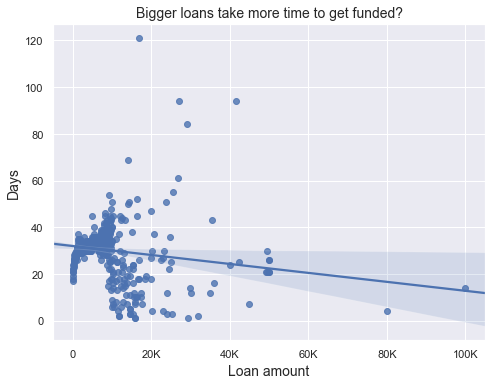

In [54]:
# create dataframe
loan_amount_time = pd.DataFrame({'loan_amount_size': loan_amount_size, 'avg_time_loan': avg_time_loan})

# scatter plot
sns.regplot(x='loan_amount_size', y='avg_time_loan', data=loan_amount_time)

# formatting
plt.title("Bigger loans take more time to get funded?", fontsize=14)
plt.xticks([0, 20000, 40000, 60000, 80000, 100000], ['0', '20K', '40K','60K', '80K', '100K'])
plt.xlabel("Loan amount", fontsize=14)
plt.ylabel("Days", fontsize=14)

plt.subplots_adjust(left=0, bottom=-0.1, right=1, top=1, wspace=0.6, hspace=0.4)
plt.show()

In [55]:
# observed correlation coefficient
obs_corr = pearson_r(loan_amount_size, avg_time_loan)

print("Correlation between loan amount and time to fund:", obs_corr)

Correlation between loan amount and time to fund: -0.1664560292672075


In [56]:
# 10000 permutations
perm_replicates = np.empty(10000)

for i in range(len(perm_replicates)):
    x_permuted = np.random.permutation(loan_amount_size)
    perm_replicates[i] = pearson_r(x_permuted, avg_time_loan)

# p-value
p_value = np.sum(perm_replicates <= obs_corr) / len(perm_replicates)

print("p-value:", p_value)

p-value: 0.0


**In general**, there is a significant negative correlation between the size of the loan and the time it takes to get funded, when considering the average time each loan size takes to get funded. We must consider the results by the number of loans for each size, though.

In [57]:
# percentage of loans smaller or equal to 5000 USD
round(data['loan_amount'].value_counts().sort_index()[:5000].sum() / data['loan_amount'].value_counts().sum(), 2)

0.99

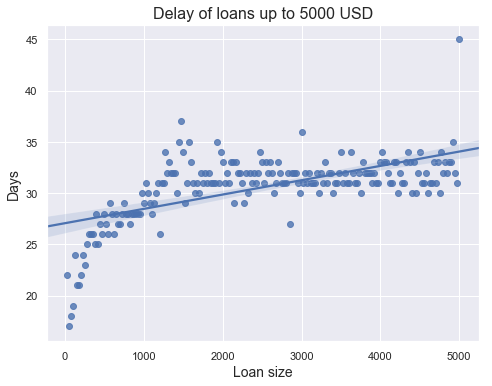

In [58]:
# size position
size_pos = loan_amount_size.index(5000)+1

# create dataframe
loan_amount_time_5000 = pd.DataFrame({'loan_amount_size_5000': loan_amount_size[:size_pos], 
                                      'avg_time_loan_5000': avg_time_loan[:size_pos]})

# scatter plot
sns.regplot(x='loan_amount_size_5000', y='avg_time_loan_5000', data=loan_amount_time_5000)

# formatting
plt.title("Delay of loans up to 5000 USD", fontsize=16)
# plt.xticks([0, 20000, 40000, 60000, 80000, 100000], ['0', '20K', '40K','60K', '80K', '100K'])
plt.xlabel("Loan size", fontsize=14)
plt.ylabel("Days", fontsize=14)

plt.subplots_adjust(left=0, bottom=-0.1, right=1, top=1, wspace=0.6, hspace=0.4)
plt.show()

In [59]:
# Correlation coefficient
obs_corr = pearson_r(loan_amount_size[:size_pos], avg_time_loan[:size_pos])

print("Correlation between loan amount (up to 5000 USD) and time to fund:", obs_corr)

Correlation between loan amount (up to 5000 USD) and time to fund: 0.6229458943939438


There is a **significative positive correlation between the loan amount and a funding delay**, up until **5000USD**, which constitutes 99% of the loans.

We notice that up until 1000USD there is an exponential increase in average delay. In fact, 77% of the loans are up to that value.

In [60]:
# percentage of loans smaller or equal to 1000 USD
round(data['loan_amount'].value_counts().sort_index()[:1000].sum() / data['loan_amount'].value_counts().sum(), 2)

0.77

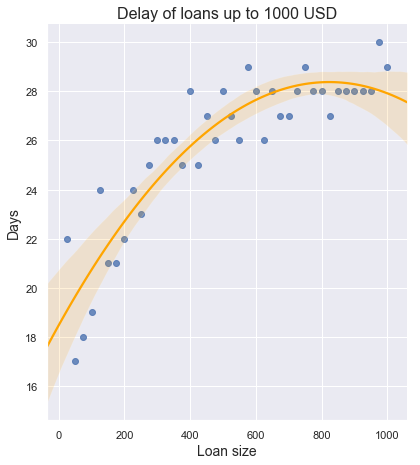

In [61]:
# size position
size_pos = loan_amount_size.index(1000)+1

# create dataframe
loan_amount_time_1000 = pd.DataFrame({'loan_amount_size_1000': loan_amount_size[:size_pos], 
                                      'avg_time_loan_1000': avg_time_loan[:size_pos]})

# scatter plot
sns.lmplot(x='loan_amount_size_1000', y='avg_time_loan_1000', data=loan_amount_time_1000, 
           order=2, line_kws={'color': 'orange'})

# formatting
plt.title("Delay of loans up to 1000 USD", fontsize=16)
# plt.xticks([0, 20000, 40000, 60000, 80000, 100000], ['0', '20K', '40K','60K', '80K', '100K'])
plt.xlabel("Loan size", fontsize=14)
plt.ylabel("Days", fontsize=14)

plt.subplots_adjust(left=0, bottom=-0.1, right=1, top=1, wspace=0.6, hspace=0.4)
plt.show()

In [62]:
# Correlation coefficient
obs_corr = pearson_r(loan_amount_size[:size_pos], avg_time_loan[:size_pos])

print("Correlation between loan amount (up to 1000 USD) and time to fund:", obs_corr)

Correlation between loan amount (up to 1000 USD) and time to fund: 0.8404788856034583


There is a **significative positive correlation between the loan amount and a funding delay**, up until **1000USD**, which constitutes 77% of the loans.

##### **Does the sector of the loan influences the time of funding?**

Distribution of loans among sectors

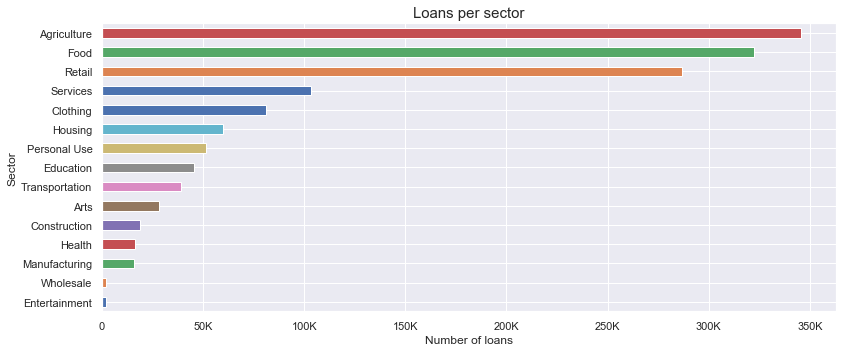

In [63]:
# quantity of loans each sector has
data['sector_name'].value_counts(ascending=True).plot(kind='barh')

# formatting
plt.title("Loans per sector", fontsize=15)
plt.xlabel("Number of loans")
plt.ylabel("Sector")
plt.xticks([0, 50000, 100000, 150000, 200000, 250000, 300000, 350000], 
           ["0", "50K", "100K", "150K", "200K", "250K", "300K", "350K"])
plt.subplots_adjust(left=0, bottom=0, right=1.7, top=1, wspace=0, hspace=0.6)
plt.show()

In [64]:
# percentage of loans for the 6 main sectors
print(round(data['sector_name'].value_counts()[:6]/data['sector_name'].value_counts().sum()*100))

Agriculture    24.0
Food           23.0
Retail         20.0
Services        7.0
Clothing        6.0
Housing         4.0
Name: sector_name, dtype: float64


**67% of the loans go to 3 sectors**: Agriculture (24%), Food (23%) and Retail (20%)

In [65]:
# percentage of loans for the 6 main sectors
print(round(data['sector_name'].value_counts()[:6].sum()/data['sector_name'].value_counts().sum()*100))

85.0


**85% of the loans go to 6 sectors**: Agriculture (24%), Food (23%), Retail (20%), Services (7%), Clothing (6%) and Housing (4%).

In [66]:
# select data
data_4 = data[['sector_name', 'disbursed_time', 'posted_time', 'funded_time']]
data_4 = data_4.set_index('sector_name')

# differences
start_1_sector = data_4[data_4['posted_time'] < data_4['disbursed_time']]
start_2_sector = data_4[data_4['posted_time'] > data_4['disbursed_time']]

# sector_time 1 & 2
sector_time_1 = start_1_sector['funded_time'] - start_1_sector['posted_time']
sector_time_2 = start_2_sector['funded_time'] - start_2_sector['disbursed_time']

#concatenate
sector_time = pd.concat([sector_time_1.dt.days, sector_time_2.dt.days], axis=0)

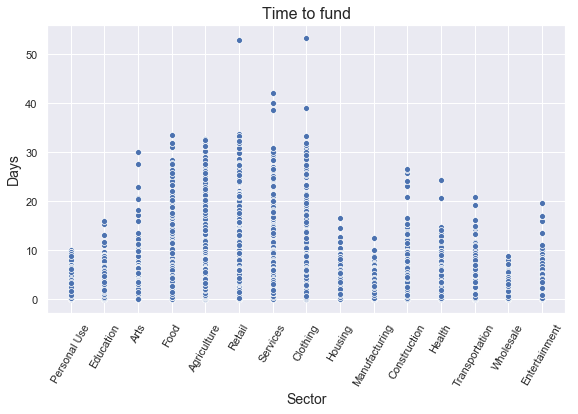

In [67]:
# create dataframe
sectors = pd.DataFrame({'sector_time': sector_time, 'sectors': sector_time.index})

# scatter plot
sns.scatterplot(x='sectors', y='sector_time', data=sectors)

# formatting
plt.title("Time to fund", fontsize=16)
plt.yticks([0, 100, 200, 300, 400, 500], ['0', '10', '20','30', '40', '50'])
plt.xlabel("Sector", fontsize=14)
plt.ylabel("Days", fontsize=14)
plt.xticks(rotation=60)

plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1, wspace=0.6, hspace=0.4)
plt.show()

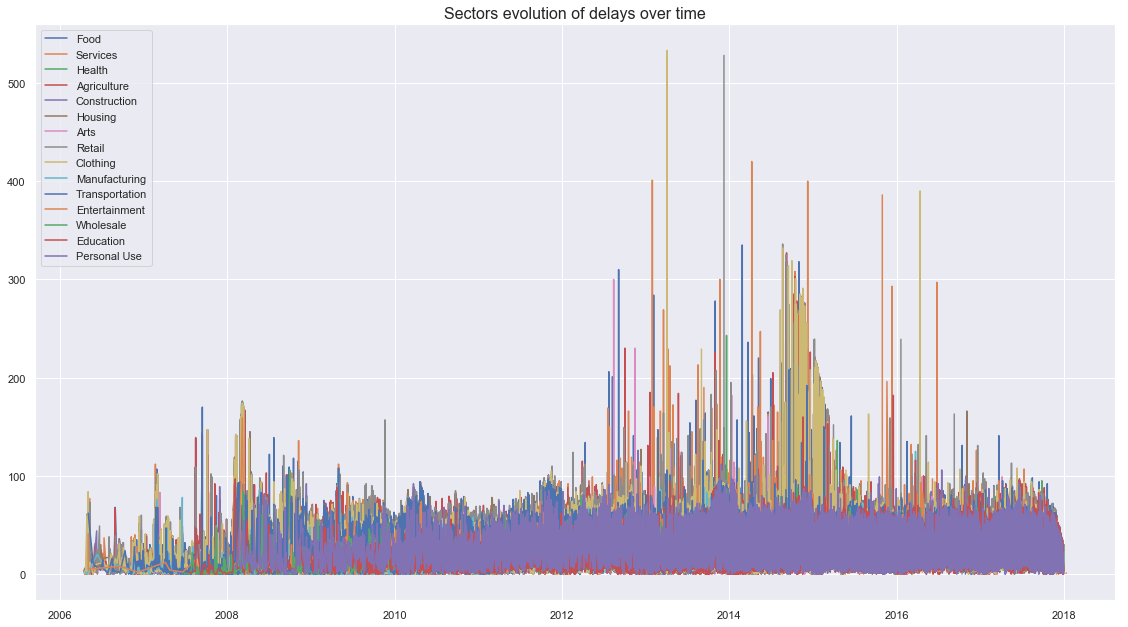

In [68]:
# sectors evolution of delays over time 

# build data frame 'sector_ordered'
sector_ordered_1 = pd.concat([start_1_sector, sector_time_1], axis=1)
sector_ordered_2 = pd.concat([start_2_sector, sector_time_2], axis=1)
sector_ordered = pd.concat([sector_ordered_1, sector_ordered_2], axis=0).drop(['disbursed_time', 'funded_time'], axis=1)
sector_ordered.columns = ['posted_time', 'delay']
sector_ordered.delay = sector_ordered.delay.dt.days
sector_ordered = sector_ordered.sort_values('posted_time')

# plot sector delays
for i in sector_ordered.index.unique():
    plt.plot(sector_ordered.loc[i]['posted_time'], sector_ordered.loc[i]['delay'])
    
plt.legend([i for i in sector_ordered.index.unique()], loc='upper left')
plt.title("Sectors evolution of delays over time", fontsize=16)
plt.subplots_adjust(left=0, bottom=-1, right=2.5, top=1, wspace=0, hspace=0)
plt.show()

The plot is not very clear, although there are some suspects, such as Clothing or Agriculture. Let us compute some statistics:

In [69]:
# sectors dataframe created
sectors.head()

,sector_time,sectors
sector_name,,
Personal Use,33.0,Personal Use
Education,2.0,Education
Arts,3.0,Arts
Personal Use,31.0,Personal Use
Food,31.0,Food


In [70]:
# sectors total loans, average and standard deviation
sector_loans = sectors.groupby('sectors').count().sector_time
perc_sector_loans = sector_loans / data['sector_name'].count()
sector_mean = sectors.groupby('sectors').mean().sector_time
sector_std = sectors.groupby('sectors').std().sector_time

# loans that take more than 30 days to fund, for sector
sector_30 = sectors[sectors['sector_time'] >= 30].groupby('sectors').count().sector_time

# For each sector, the percentage of loans >= 30 (total)
perc_30_total = sector_30 / data['sector_name'].count()

# For each sector, the percentage of loans >= 30 (sectorwise)
perc_30_sector = sector_30 / sector_loans


# dataframe with relevant information regarding sectors
sectors_2 = pd.DataFrame({'sectors': sectors.groupby('sectors').count().index, 'sector_loans': sector_loans, 
                          'perc_sector_loans': perc_sector_loans, 'sector_mean': sector_mean, 'sector_std': sector_std,
                          'sector_30': sector_30, 'perc_30_total': perc_30_total, 'perc_30_sector': perc_30_sector}).drop(
                         'sectors', axis=1)

sectors_2.sort_values('perc_30_total', ascending=False)

,sector_loans,perc_sector_loans,sector_mean,sector_std,sector_30,perc_30_total,perc_30_sector
sectors,,,,,,,
Agriculture,329198,0.231973,28.277067,17.447268,149388,0.105268,0.453794
Food,311404,0.219434,25.949850,16.178154,123813,0.087246,0.397596
Retail,272475,0.192003,27.749236,16.898185,120001,0.084560,0.440411
Services,97819,0.068929,27.082254,18.387316,40988,0.028883,0.419019
Clothing,76856,0.054157,27.084248,18.371744,32693,0.023037,0.425380
Housing,54465,0.038379,31.714771,16.587375,29752,0.020965,0.546259
Education,44772,0.031549,25.440208,13.943170,18929,0.013339,0.422787
Transportation,36433,0.025673,28.307386,17.009264,16455,0.011595,0.451651
Personal Use,49595,0.034948,21.932150,14.215565,12993,0.009156,0.261982


We can notice that **the main 5 sectors (which gather 80% of the loans) are the ones who influence the most a higher delay in fundings.**
* Agriculture has clearly the biggest impact.

##### Field partners 

In [71]:
# field partners 
fp = len(data['partner_id'].unique())
print("There are", fp, "Field partners")

There are 479 Field partners


Distribution of loans among field partners

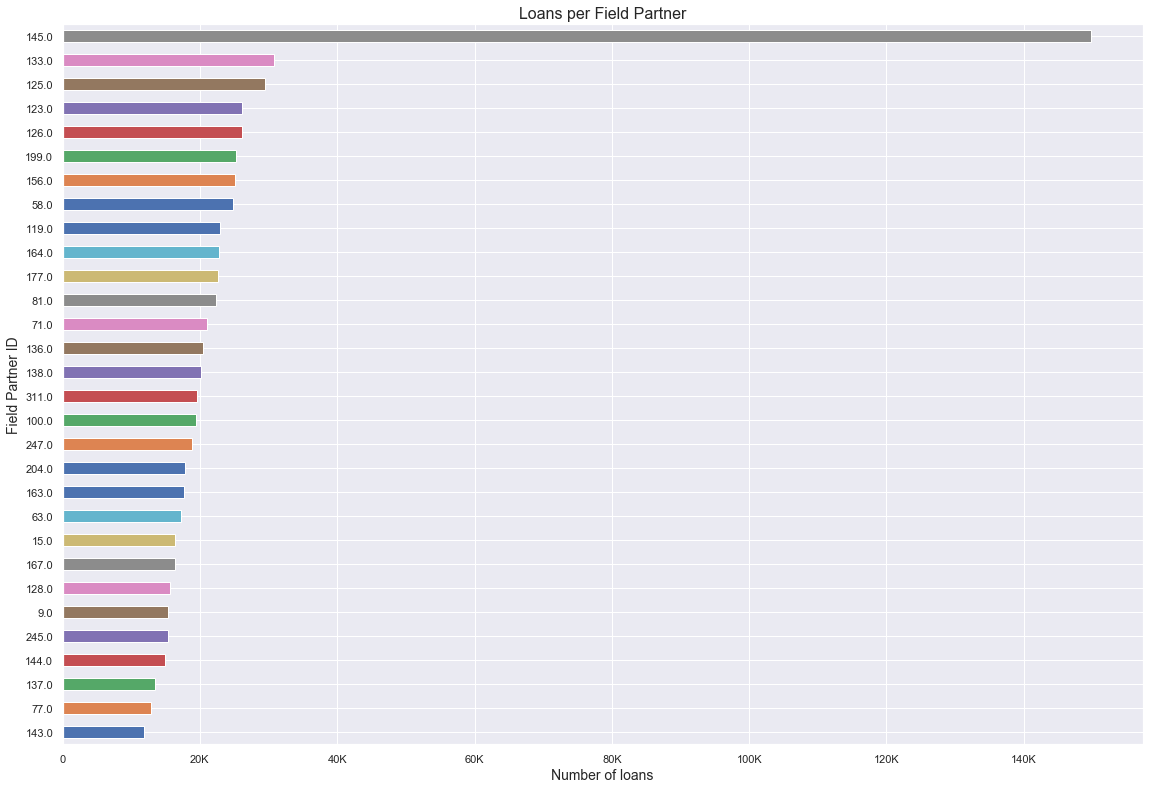

In [72]:
# quantity of loans each sector has
data['partner_id'].value_counts(ascending=True).tail(30).plot(kind='barh')

# formatting
plt.title("Loans per Field Partner", fontsize=16)
plt.xlabel("Number of loans", fontsize=14)
plt.ylabel("Field Partner ID", fontsize=14)
plt.xticks([0, 20000, 40000, 60000, 80000, 100000, 120000, 140000], ["0", "20K", "40K", "60K", "80K", "100K", "120K", "140K"])
plt.subplots_adjust(left=0, bottom=-1.5, right=2.5, top=1, wspace=0, hspace=0.6)
plt.show()

In [73]:
# field partner with more loans (id 145)
print("Partner 145 has", round(data['partner_id'].value_counts(ascending=True).tail(1).sum()/data['partner_id'].value_counts(ascending=True).sum()*100), "% of the loans")

# 120 field partners with more loans
print("The 30 field partners ( of",fp,") with more loans have", round(data['partner_id'].value_counts(ascending=True).tail(30).sum()/data['partner_id'].value_counts(ascending=True).sum()*100), "% of them")

Partner 145 has 11.0 % of the loans
The 30 field partners ( of 479 ) with more loans have 52.0 % of them


Of the **479** unique field partners, **11%** of the loans are organized by field partner nº 145, 52% by 30, and **90%** by 120 field partners.

In [74]:
#total differences
start_1 = data[data['posted_time'] < data['disbursed_time']]
start_2 = data[data['posted_time'] > data['disbursed_time']]

# select data
data_5 = pd.concat([start_1, start_2], axis=0)
data_5 = data_5.set_index('partner_id')
data_5['partner_id'] = data_5.index

# total differences 
start_1_field = data_5[data_5['posted_time'] < data_5['disbursed_time']]
start_2_field = data_5[data_5['posted_time'] > data_5['disbursed_time']]

# field_time_loans 1 & 2
field_time_1_loan = start_1_field['funded_time'] - start_1_field['posted_time']
field_time_2_loan = start_2_field['funded_time'] - start_2_field['disbursed_time']

#concatenate
field_time = pd.concat([field_time_1_loan.dt.days, field_time_2_loan.dt.days], axis=0)


# create list of field partners, mean time of funding, and relative amount of loans
field_partners_ids = list(set(field_time.sort_index().index.dropna()))
avg_time_field = []
avg_field_part = []
fp_loans = []

for i in field_partners_ids:
        avg_time_field.append(round(field_time.loc[i].mean()))
        avg_field_part.append(data['partner_id'].value_counts()[i]/data['partner_id'].value_counts().sum()*100*500) 
        fp_loans.append(data['partner_id'].value_counts()[i])

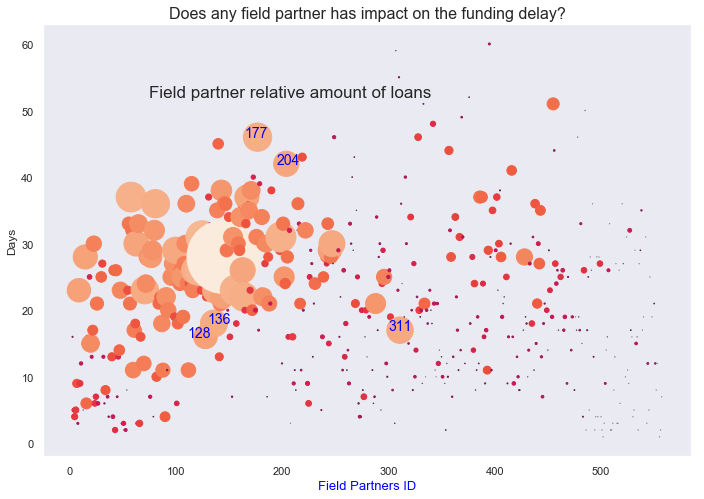

In [75]:
# create dataframe
field_partn_time = pd.DataFrame({'field_partners_ids': field_partners_ids, 'avg_time_field': avg_time_field, 'avg_field_part': avg_field_part, 'fp_loans': fp_loans})

# scatter plot
plt.scatter(field_partners_ids, avg_time_field, s=avg_field_part, c=np.log10(avg_field_part))   
plt.text(75, 52, 'Field partner relative amount of loans', fontsize=17)

# field partners of interest
plt.text(300, 17, '311', fontsize=14, color='blue') #17
plt.text(111, 16, '128', fontsize=14, color='blue') #16
plt.text(130, 18, '136', fontsize=14, color='blue') #18
plt.text(165, 46, '177', fontsize=14, color='blue') #46
plt.text(195, 42, '204', fontsize=14, color='blue') #42

# formatting
plt.title("Does any field partner has impact on the funding delay?", fontsize=16)
plt.xlabel("Field Partners ID", fontsize=13, color='blue')
plt.ylabel("Days")
plt.grid(False)

plt.subplots_adjust(left=0, bottom=-0.5, right=1.5, top=1, wspace=0.6, hspace=0.4)
plt.show()

**There are not many field partners with a considerable size of loans that affect the overall average time loans take to get funded**. Still, a few of them are relatively away from the concentrated 30-day delay.

In [76]:
# any problematic field partner?
new_fp = field_partn_time.sort_values('avg_time_field', ascending=False)
new_fp['avg_field_part'] = new_fp['avg_field_part'] / 500

# field partners that take more than 27 days on average to fund loans and with more than 1.5% of the loans
new_fp[(new_fp['avg_time_field'] >= 27) & (new_fp['avg_field_part'] >= 1.5)].sort_values('avg_time_field', ascending=False)

,field_partners_ids,avg_time_field,avg_field_part,fp_loans
156,177.0,46.0,1.610007,22582
48,58.0,37.0,1.767214,24787
68,81.0,36.0,1.592396,22335
105,125.0,31.0,2.104373,29516
171,199.0,31.0,1.805643,25326
124,145.0,28.0,10.680713,149808
113,133.0,27.0,2.192780,30756
106,126.0,27.0,1.859257,26078


Field partner with more loans, nº 145, with 11% of the loans, has an above average time to fund his loans.

##### What is the relationship between the number of lenders and the time it takes to get funding?

In [77]:
# total differences
start_1 = data[data['posted_time'] < data['disbursed_time']]
start_2 = data[data['posted_time'] > data['disbursed_time']]

# select data
data_6 = pd.concat([start_1, start_2], axis=0)
data_6 = data_6.set_index('num_lenders_total')
data_6['num_lenders_total'] = data_6.index

# total differences 
start_1_numlend = data_6[(data_6['posted_time'] < data_6['disbursed_time']) & (data_6['loan_amount'] <= data_6['funded_amount'])]
start_2_numlend = data_6[(data_6['posted_time'] > data_6['disbursed_time']) & (data_6['loan_amount'] <= data_6['funded_amount'])]

# loan_time_numlend 1 & 2
loan_time_1_numlend = start_1_numlend['funded_time'] - start_1_numlend['posted_time']
loan_time_2_numlend = start_2_numlend['funded_time'] - start_2_numlend['disbursed_time']

#concatenate
loan_time_numlend = pd.concat([loan_time_1_numlend.dt.days, loan_time_2_numlend.dt.days], axis=0)

# create list of loan_numlend and mean time of funding
loan_numlend = sorted(list(set(loan_time_numlend.index)))
avg_time_numlend = []

for i in loan_numlend:
    avg_time_numlend.append(round(loan_time_numlend.loc[i].mean()))

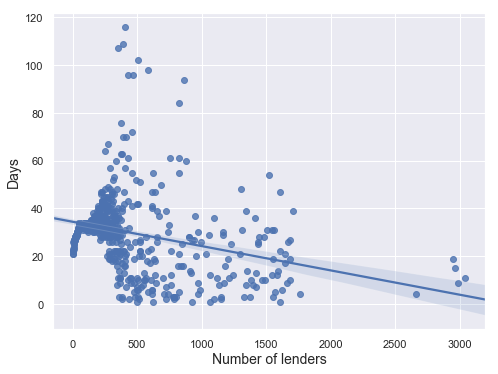

In [78]:
# create dataframe
loan_numlend_time = pd.DataFrame({'loan_numlend': loan_numlend, 'avg_time_numlend': avg_time_numlend})

# scatter plot
sns.regplot(x='loan_numlend', y='avg_time_numlend', data=loan_numlend_time)

# formatting
# plt.title("Less time to fund when more lenders come in", fontsize=16)
plt.xlabel("Number of lenders", fontsize=14)
plt.ylabel("Days", fontsize=14)

plt.subplots_adjust(left=0, bottom=-0.1, right=1, top=1, wspace=0.6, hspace=0.4)
plt.show()

Globally, as the number of lenders increased, the average number of days to fund a loan decreased. However, we should also look at what percentage of the total loans each dot (number of lenders) have.

Looking at the relationship between the number of loans per number of lenders.

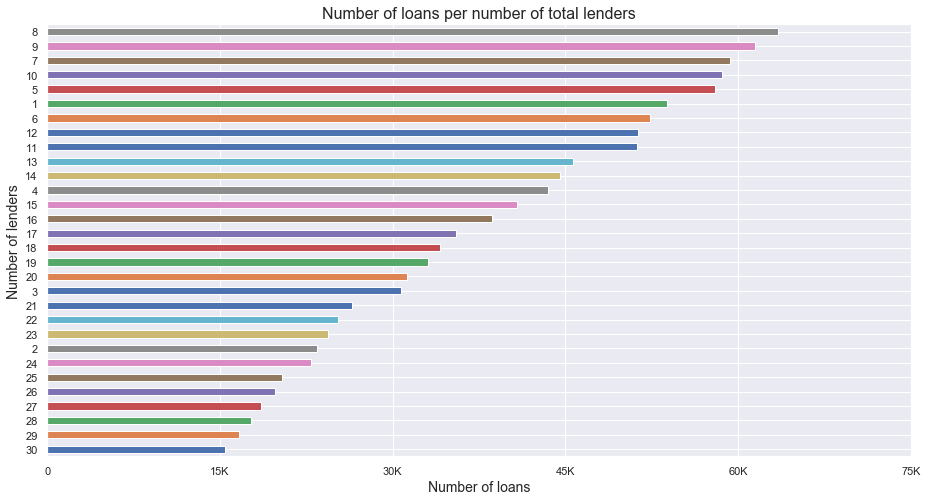

In [79]:
# number of loans per total number of lenders
data['num_lenders_total'].value_counts(ascending=True).tail(30).plot(kind='barh')

# formatting
plt.title("Number of loans per number of total lenders", fontsize=16)
plt.xlabel("Number of loans", fontsize=14)
plt.ylabel("Number of lenders", fontsize=14)
plt.xticks([0, 15000, 30000, 45000, 60000, 75000], ["0", "15K", "30K", "45K", "60K", "75K"])
plt.subplots_adjust(left=0, bottom=-0.5, right=2, top=1, wspace=0, hspace=0)
plt.show()

In [80]:
# percentage of total loans that the 60 highest number of loans per number of lenders
data['num_lenders_total'].value_counts(ascending=True).tail(60).sum()/len(data['num_lenders_total'])*100

93.80166046330055

94% of the loans are composed by up to 60 lenders. 

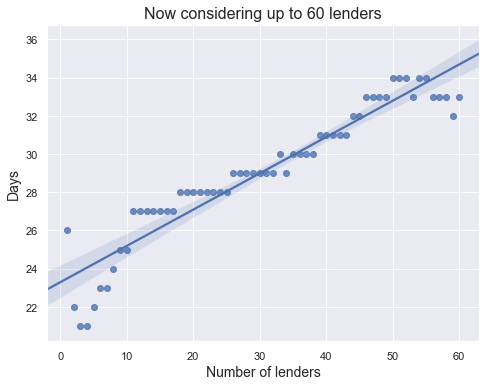

In [81]:
# create dataframe
loan_numlend_time_60 = pd.DataFrame({'loan_numlend_60': loan_numlend[:60], 'avg_time_numlend_60': avg_time_numlend[:60]})

# scatter plot
sns.regplot(x='loan_numlend_60', y='avg_time_numlend_60', data=loan_numlend_time_60)

# formatting
plt.title("Now considering up to 60 lenders", fontsize=16)
plt.xlabel("Number of lenders", fontsize=14)
plt.ylabel("Days", fontsize=14)

plt.subplots_adjust(left=0, bottom=-0.1, right=1, top=1, wspace=0.6, hspace=0.4)
plt.show()

In [82]:
# Correlation coefficient
pearson_r(loan_numlend[:60], avg_time_numlend[:60])

0.9487753506069476

This seemingly organized disposition could suggest that the time to disburse and fund a loan is not subject to much uncertainty, in the sense that field partners may do prearranged commitments to fund the loans.

##### Does repayment interval affect delay?

In [83]:
# number of loans per repayment interval
data['repayment_interval'].value_counts()

monthly      777963
irregular    529444
bullet       111093
weekly          622
Name: repayment_interval, dtype: int64

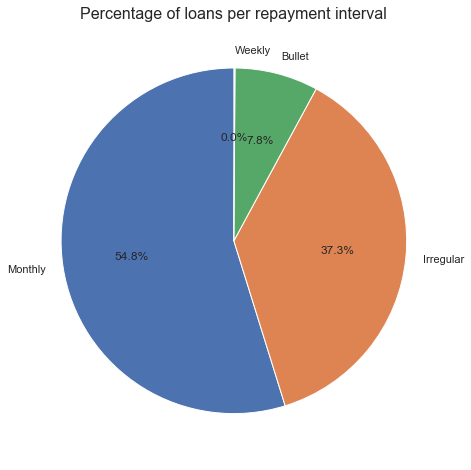

In [84]:
# define sizes
size_monthly = round(data['repayment_interval'].value_counts()[0]/data['repayment_interval'].value_counts().sum(), 3)
size_irregular = round(data['repayment_interval'].value_counts()[1]/data['repayment_interval'].value_counts().sum(), 3)
size_bullet = round(data['repayment_interval'].value_counts()[2]/data['repayment_interval'].value_counts().sum(), 3)
size_weekly = round(data['repayment_interval'].value_counts()[3]/data['repayment_interval'].value_counts().sum(), 3)

# formatting
labels = ["Monthly", "Irregular", "Bullet", "Weekly"]
sizes = [size_monthly, size_irregular, size_bullet, size_weekly]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of loans per repayment interval", fontsize=16)
plt.ylabel("")

plt.subplots_adjust(left=0, bottom=-0.5, right=1, top=1, wspace=0, hspace=0)
plt.show()

In [85]:
#total differences
start_1 = data[data['posted_time'] < data['disbursed_time']]
start_2 = data[data['posted_time'] > data['disbursed_time']]

# select data
data_7 = pd.concat([start_1, start_2], axis=0)
data_7 = data_7.set_index('repayment_interval')
data_7['repayment_interval'] = data_7.index

# total differences 
start_1_repay = data_7[data_7['posted_time'] < data_7['disbursed_time']]
start_2_repay = data_7[data_7['posted_time'] > data_7['disbursed_time']]

# repay_time_loans 1 & 2
repay_time_1_loan = start_1_repay['funded_time'] - start_1_repay['posted_time']
repay_time_2_loan = start_2_repay['funded_time'] - start_2_repay['disbursed_time']

#concatenate
repay_time = pd.concat([repay_time_1_loan.dt.days, repay_time_2_loan.dt.days], axis=0)

# create list of repayment intervals, mean time of funding, and relative amount of loans
repay_intervals = list(set(repay_time.index))
avg_time_repay = []

for i in repay_intervals:
        avg_time_repay.append(round(repay_time.loc[i].mean()))  

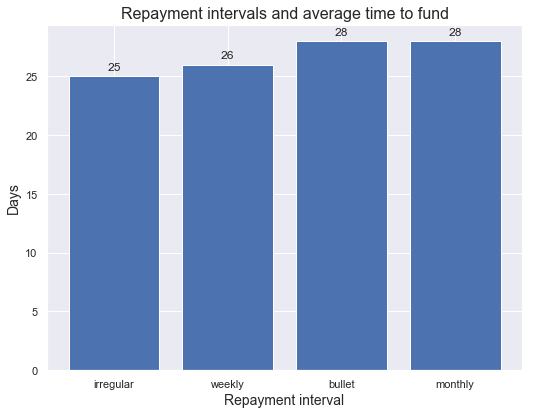

In [86]:
# repayment interval average time to fund
plt.bar(repay_intervals, avg_time_repay)

# formatting
plt.title("Repayment intervals and average time to fund", fontsize=16)
plt.xlabel("Repayment interval", fontsize=14)
plt.ylabel("Days", fontsize=14)

for x, y in zip(repay_intervals, avg_time_repay):
    plt.annotate("%i" % y, (x, y + 0.5), ha='center')

plt.subplots_adjust(left=0, bottom=-0.2, right=1.1, top=1, wspace=0, hspace=0)
plt.show()

In [87]:
print("Weekly repayments standard deviation:", round(repay_time.loc['weekly'].std()))
print("Bullet repayments standard deviation:",round(repay_time.loc['bullet'].std()))
print("Monthly repayments standard deviation:",round(repay_time.loc['monthly'].std()))
print("Irregular repayments standard deviation:",round(repay_time.loc['irregular'].std()))

Weekly repayments standard deviation: 26
Bullet repayments standard deviation: 18
Monthly repayments standard deviation: 19
Irregular repayments standard deviation: 14


It seems that **irregular repayments behave better than monthly repayments**.

**Is there a significant difference?**

To test this, I am going to divide the data into 2 parts: below the median and above the median of the time to fund a loan. I will then perform a chi-square test.

- Null hypothesis: *"the type of repayment interval does not affect delays"*
- Alternate hypothesis: *"the type of repayment interval does affect delays"*

In [88]:
# time to fund
loan_time.describe().apply(lambda x: format(x, 'f'))

count    1354847.000000
mean          26.995140
std           16.891946
min            0.000000
25%           14.000000
50%           26.000000
75%           36.000000
max          533.000000
dtype: object

In [89]:
# subsets
above_median = data.loc[loan_time[loan_time >= loan_time.median()].index]
below_median = data.loc[loan_time[loan_time < loan_time.median()].index]

In [90]:
# repayment intervals
repay_intervals

# function for counting the number of repayment intervals
def count_rep(rep, df):
    count = df['repayment_interval'].value_counts()[rep]
    return count

# function for computing the proportion
def prop_rep(rep, df):
    prop = df['repayment_interval'].value_counts()[rep] / len(df)
    return prop

# observed and expected values
observed_values = []
expected_values = []

for i in repay_intervals:
    observed_values.append(count_rep(i, above_median))
    expected_values.append(prop_rep(i, below_median))

expected_values = [round(x * len(above_median)) for x in expected_values]

print("Repayment intervals:", repay_intervals)
print("Observed values above the median:", observed_values)
print("Expected values above the median:", expected_values)

print("chi-square test:", scipy.stats.chisquare(observed_values, expected_values))


Repayment intervals: ['irregular', 'weekly', 'bullet', 'monthly']
Observed values above the median: [258350, 253, 54848, 389123]
Expected values above the median: [283400.0, 397.0, 48398.0, 370378.0]
chi-square test: Power_divergenceResult(statistic=4074.7097870097173, pvalue=0.0)


We then reject the hypothesis that the type of repayment interval does not have effect on the delay in funding. **There is a significant difference**. After this, it is not a huge step to say that all in all irregular repayments have a significant better performance than monthly repayments, regarding delays.

##### When the loan is not completely funded, how big  it is?

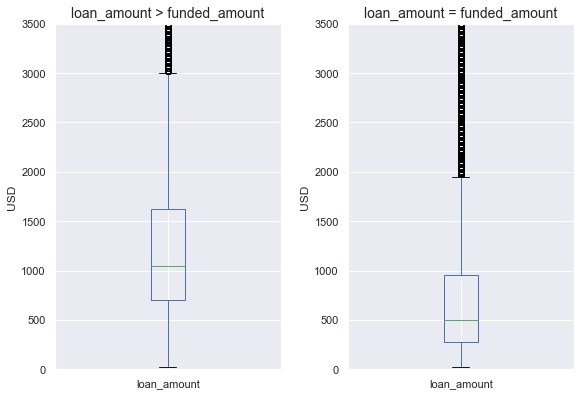

In [91]:
# loan_amount > funded_amount
plt.subplot(1, 2, 1)
data[data['loan_amount'] > data['funded_amount']].loan_amount.plot(kind='box')
plt.title("loan_amount > funded_amount", fontsize=14)
plt.ylabel("USD")
plt.ylim(0, 3500)

# loan_amount = funded_amount
plt.subplot(1, 2, 2)
data[data['loan_amount'] == data['funded_amount']].loan_amount.plot(kind='box')
plt.title("loan_amount = funded_amount", fontsize=14)
plt.ylabel("USD")
plt.ylim(0, 3500)

plt.subplots_adjust(left=0, bottom=-0.2, right=1.2, top=1, wspace=0.3, hspace=0.4)
plt.show()

They are bigger than usual, as expected.

## Extra data wrangling and EDA

**Building the new dataframe** for modeling:

In [92]:
# total differences
start_1 = data[data['posted_time'] < data['disbursed_time']]
start_2 = data[data['posted_time'] > data['disbursed_time']]

# loan time 1 & 2
loan_time_1 = start_1['funded_time'] - start_1['posted_time']
loan_time_2 = start_2['funded_time'] - start_2['disbursed_time']

#concatenate
real_time = pd.concat([loan_time_1, loan_time_2], axis=0)#dt.days

# new dataframe to deal with
new_df = pd.concat([start_1, start_2], axis=0)

# add the time to fund the loan
new_df['real_time'] = real_time

# order by date
new_df = new_df.sort_values('posted_time')

###################### (pause) ###########################################################

Before continuing the rearrangement of the new dataframe, let's use this new_df and do **some more EDA**.

**Does lender term influence delay?**

In [93]:
new_df[new_df.lender_term.isna()].shape

(23, 22)

Since there are only 23 missing values in the lender_term column, I will opt to delete them.

In [94]:
# index values
lender_term_delete = new_df[new_df.lender_term.isna()].index

# remove rows
new_df = new_df.drop(lender_term_delete)

# new shape
new_df.shape

(1416557, 22)

Let us now look at the relationship between the lender term length and its average delay

In [95]:
# create array of unique lender terms and compute their mean delay
set_lender_terms = new_df.lender_term.unique()
avg_time_lender_term = []

for i in set_lender_terms:
    avg_time_lender_term.append(new_df[new_df['lender_term'] == i].real_time.dt.days.mean())

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


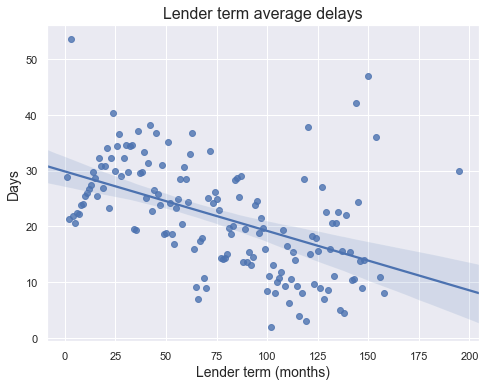

In [96]:
# create dataframe
time_lender_term = pd.DataFrame({'lender_term_i': set_lender_terms, 'avg_time_lender_term': avg_time_lender_term})

# scatter plot
sns.regplot(x='lender_term_i', y='avg_time_lender_term', data=time_lender_term)

# formatting
plt.title("Lender term average delays", fontsize=16)
plt.xlabel("Lender term (months)", fontsize=14)
plt.ylabel("Days", fontsize=14)

plt.subplots_adjust(left=0, bottom=-0.1, right=1, top=1, wspace=0.6, hspace=0.4)
plt.show()

In [97]:
# correlation
print("Correlation between lender term (months) and delay: {}".format(pearson_r(set_lender_terms, avg_time_lender_term)))

Correlation between lender term (months) and delay: -0.4954661735046612


As expected, the longer the lender term, the stronger the possibility that there is a smaller delay, on average.

**Currency**

In [98]:
# percentage of loans by currency
nr_currencies = 20

# n largest currencies
print("Total percentage of loans by the {} largest currencies: {}".format(
    nr_currencies,
    new_df.currency.value_counts()[:nr_currencies].sum() / new_df.currency.value_counts().sum()))

# 3 largest currencies
print("Total percentage of loans by the 3 largest currencies: {}".format(
    new_df.currency.value_counts()[:3].sum() / new_df.currency.value_counts().sum()))

Total percentage of loans by the 20 largest currencies: 0.8534700686241359
Total percentage of loans by the 3 largest currencies: 0.4695497604402788


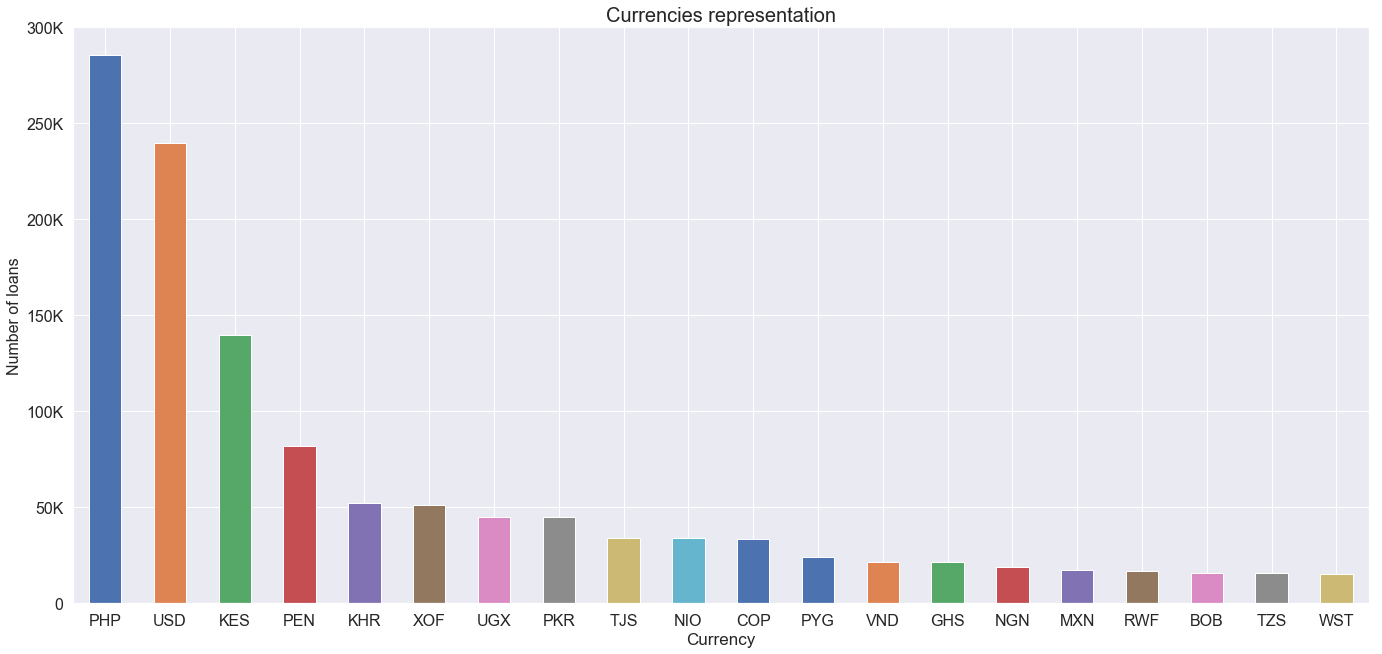

In [99]:
# bar plot
new_df.currency.value_counts()[:nr_currencies].plot(kind='bar')

# formatting
plt.title("Currencies representation", fontsize=20)
plt.xticks(rotation=0, fontsize=16)
plt.xlabel("Currency", fontsize=17)
plt.ylabel("Number of loans", fontsize=16)
plt.yticks([0, 50000, 100000, 150000, 200000, 250000, 300000], 
           ['0', '50K', '100K','150K', '200K', '250K', '300K'], fontsize=16)

plt.subplots_adjust(left=0, bottom=-1, right=3, top=1, wspace=0, hspace=0)
plt.show()

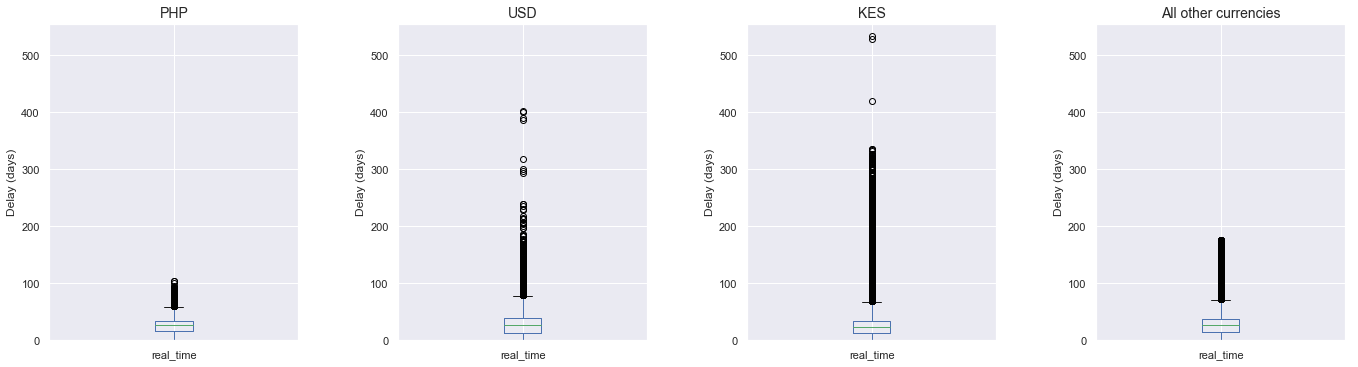

In [100]:
# currency characteristics
currencies_3 = ['PHP', 'USD', 'KES']
    
# boxplots
for i, j in enumerate(currencies_3):
    plt.subplot(1, 4, i+1)
    new_df[new_df['currency'] == j].real_time.dt.days.plot(kind='box')
    plt.title(j, fontsize=14)
    plt.ylabel("Delay (days)")
    plt.ylim(0, 555)
        
# dataframe for the other currencies
curr_df = new_df[~new_df['currency'].isin(currencies_3)]

plt.subplot(1, 4, 4)
curr_df.real_time.dt.days.plot(kind='box')
plt.title("All other currencies", fontsize=14)
plt.ylabel("Delay (days)")
plt.ylim(0, 555)

plt.subplots_adjust(left=0, bottom=-0.1, right=3, top=1, wspace=0.4, hspace=0.5)
plt.show()    

Now with a zoom excluding outliers:

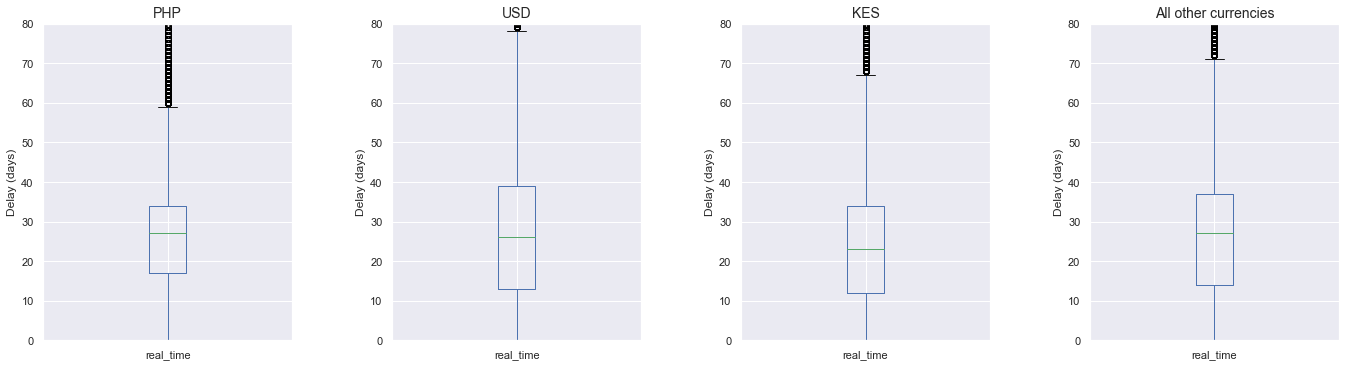

In [101]:
# currency characteristics
currencies_3 = ['PHP', 'USD', 'KES']
    
# boxplots
for i, j in enumerate(currencies_3):
    plt.subplot(1, 4, i+1)
    new_df[new_df['currency'] == j].real_time.dt.days.plot(kind='box')
    plt.title(j, fontsize=14)
    plt.ylabel("Delay (days)")
    plt.ylim(0, 80)
        
# dataframe for the other currencies
curr_df = new_df[~new_df['currency'].isin(currencies_3)]

plt.subplot(1, 4, 4)
curr_df.real_time.dt.days.plot(kind='box')
plt.title("All other currencies", fontsize=14)
plt.ylabel("Delay (days)")
plt.ylim(0, 80)

plt.subplots_adjust(left=0, bottom=-0.1, right=3, top=1, wspace=0.4, hspace=0.5)
plt.show()    

We see that **USD** is probably the currency that contributes more to delay in loans.

##### Currency policy

Currency policy can be of 2 kinds: shared or not shared. Kiva Field Partners have the choice to "opt-in" to Currency Risk Protection, which means they can choose to manage all Foreign Exchange Risk themselves, or alternatively they pass on the risk of currency devaluation over 20% to Kiva Lenders.

In [102]:
new_df.currency_policy.value_counts()

shared        1098062
not shared     318495
Name: currency_policy, dtype: int64

In [103]:
# percentage-wise
print("Shared: {0:.0%}".format(new_df.currency_policy.value_counts()[0]/new_df.currency_policy.value_counts().sum()))
print("Not shared: {0:.0%}".format(new_df.currency_policy.value_counts()[1]/new_df.currency_policy.value_counts().sum()))

Shared: 78%
Not shared: 22%


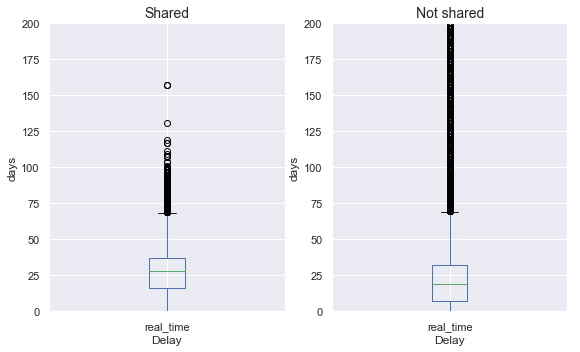

In [104]:
# plot differences in delay (shared)
plt.subplot(1, 2, 1)
new_df[new_df['currency_policy'] == 'shared'].real_time.dt.days.plot(kind='box')
plt.title("Shared", fontsize=14)
plt.xlabel("Delay")
plt.ylabel("days")
plt.ylim(0, 200)

# plot differences in delay (not shared)
plt.subplot(1, 2, 2)
new_df[new_df['currency_policy'] == 'not shared'].real_time.dt.days.plot(kind='box')
plt.title("Not shared", fontsize=14)
plt.xlabel("Delay")
plt.ylabel("days")
plt.ylim(0, 200)

plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1, wspace=0.2, hspace=0.4)
plt.show()

A not shared currency policy has the more problematic cases, as expected, as there are a lot more (long-time) outliers. However, overall, have a smaller median and general statistic properties than loans with a currency shared policy.

In [105]:
# status of the shared currency policy cases
new_df[new_df['currency_policy'] == 'shared'].status.value_counts()

funded         1041630
expired          49841
fundRaising       3397
refunded          3194
Name: status, dtype: int64

In [106]:
# status of the not shared currency policy cases
new_df[new_df['currency_policy'] == 'not shared'].status.value_counts()

funded         308443
expired          6962
refunded         2931
fundRaising       159
Name: status, dtype: int64

**In general, how does the delay behaves over time?**

General presentation of the real time to fund a loan over time and its trend:

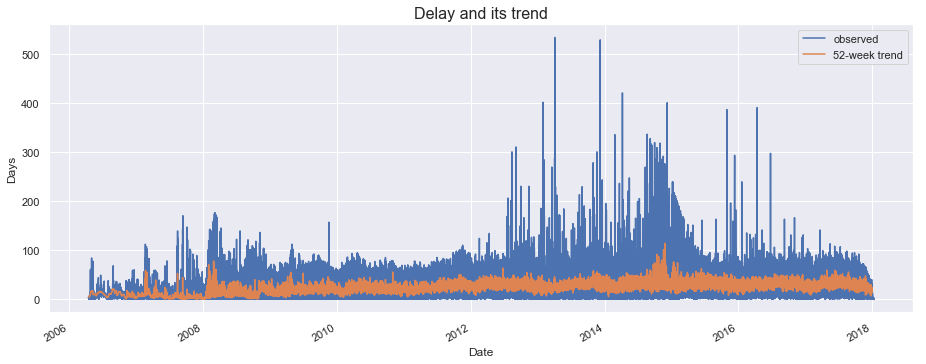

In [107]:
# delays dataframe
delays = pd.DataFrame({'real_time': new_df['real_time'].dt.days, 'time': new_df['posted_time']}).dropna()
delays.set_index('time', inplace=True)

# decomposition
decomposition = sm.tsa.seasonal_decompose(delays['real_time'], freq=52)

decomposition.observed.plot()
decomposition.trend.plot()

plt.title("")
plt.legend(['observed', '52-week trend'])

plt.xlabel("Date")
plt.ylabel("Days")
plt.title("Delay and its trend", fontsize=16)
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0, hspace=0)
plt.show()

As we can see, there is a tendency to increase the fund delay over time. Looking more closely at the 52-week trend:

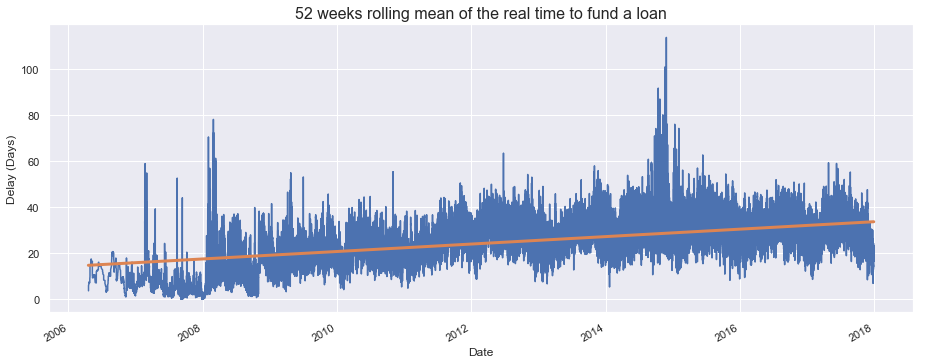

In [108]:
# 52 weeks rolling mean of the real time to fund a loan [decomposition trend (freq=52)]
decomposition.trend.plot()

# regression line
ordinals_dec = [i.toordinal() for i in decomposition.trend.dropna().index]

a, b = np.polyfit(ordinals_dec, decomposition.trend.dropna(), 1)
x = np.array([min(ordinals_dec), max(ordinals_dec)])
y = a * x + b
plt.plot(x, y, linewidth=3)

# formatting
plt.title("52 weeks rolling mean of the real time to fund a loan", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Delay (Days)")
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0, hspace=0)
plt.show()

As we can see in the 52-week trend, **the delays are increasing, on average, over time**. 

**Preparing the dataset for modeling analysis:**

We will select only certain columns of interest, and exclude all the rows where a computation of the real time of delay was not possible. These don't affect the previous EDA made. 

We will not consider the following variables:
* ['loan_id', 'funded_amount', 'status', 'activity_name', 'loan_use', 'country_code', 'town_name', 'posted_time', 'planned_expiration_time', 'disbursed_time', 'funded_time', 'borrower_genders']

They are either not necessary or do not possess suficient quality data in order to be considered.

In [109]:
# rows excluded
print("Number of real_time missing values excluded: {}".format(new_df[new_df.real_time.isna()].count().posted_time))

Number of real_time missing values excluded: 61732


In [110]:
# excluding them
missing_real_time = new_df[new_df.real_time.isna()].index

new_df = new_df.drop(missing_real_time)

# new shape
new_df.shape

(1354825, 22)

In [111]:
# rearrange new_df with only the columns of interest
col_interest = ['real_time', 'loan_amount', 'sector_name', 'country_name', 'currency_policy',
               'currency', 'partner_id', 'lender_term', 'num_lenders_total', 'repayment_interval']

new_df = new_df[col_interest]

# new shape
new_df.shape

(1354825, 10)

In [112]:
# info
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1354825 entries, 1408669 to 780093
Data columns (total 10 columns):
real_time             1354825 non-null timedelta64[ns]
loan_amount           1354825 non-null float64
sector_name           1354825 non-null object
country_name          1354825 non-null object
currency_policy       1354825 non-null object
currency              1354825 non-null object
partner_id            1340846 non-null float64
lender_term           1354825 non-null float64
num_lenders_total     1354825 non-null int64
repayment_interval    1354825 non-null object
dtypes: float64(3), int64(1), object(5), timedelta64[ns](1)
memory usage: 113.7+ MB


We have missing data on the partner_id column, which represents individuals, that is, not a Kiva partner. Therefore, I will replace the missing values with 1.

In [113]:
# partner_id values
new_df['partner_id'].sort_values().unique()

array([  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  13.,  15.,
        16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,
        27.,  30.,  31.,  32.,  33.,  34.,  36.,  37.,  40.,  41.,  42.,
        43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  70.,  71.,  72.,  73.,  74.,  76.,  77.,  78.,
        79.,  80.,  81.,  82.,  84.,  85.,  87.,  88.,  90.,  91.,  92.,
        93.,  96.,  97.,  98.,  99., 100., 101., 102., 104., 105., 106.,
       107., 108., 109., 110., 111., 112., 113., 115., 116., 117., 118.,
       119., 120., 121., 122., 123., 124., 125., 126., 127., 128., 129.,
       130., 131., 132., 133., 135., 136., 137., 138., 139., 140., 141.,
       142., 143., 144., 145., 146., 147., 148., 149., 150., 151., 152.,
       153., 154., 155., 156., 157., 158., 159., 160., 161., 162., 163.,
       164., 165., 166., 167., 168., 169., 170., 17

In [114]:
# replace NaN's with 1 (individuals)
new_df.partner_id.fillna(1, inplace=True)

In [115]:
# reset index
new_df_2 = new_df.copy()
new_df_2 = new_df_2.reset_index(drop=True)

# changing real_time variable to numeric 
new_df_2['real_time'] = new_df_2['real_time'].dt.days

# changing dtype of partner_id
new_df_2['partner_id'] = new_df_2['partner_id'].astype('category')

# head
new_df_2.head()

,real_time,loan_amount,sector_name,country_name,currency_policy,currency,partner_id,lender_term,num_lenders_total,repayment_interval
0,3,700.0,Food,Cambodia,not shared,USD,9.0,10.0,15,bullet
1,4,1000.0,Services,Cambodia,not shared,USD,9.0,12.0,15,bullet
2,4,1600.0,Health,Cambodia,not shared,USD,9.0,18.0,18,bullet
3,1,600.0,Agriculture,Kenya,not shared,USD,6.0,15.0,6,monthly
4,6,450.0,Construction,Uganda,not shared,USD,8.0,9.0,10,irregular


We now need to transform all categorical variables to numbers and stay with those only.

In [116]:
# final data frame
final_df = pd.get_dummies(new_df_2)

# head
final_df.head()

,real_time,loan_amount,lender_term,num_lenders_total,sector_name_Agriculture,sector_name_Arts,sector_name_Clothing,sector_name_Construction,sector_name_Education,sector_name_Entertainment,...,partner_id_551.0,partner_id_552.0,partner_id_553.0,partner_id_555.0,partner_id_556.0,partner_id_557.0,repayment_interval_bullet,repayment_interval_irregular,repayment_interval_monthly,repayment_interval_weekly
0,3,700.0,10.0,15,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,4,1000.0,12.0,15,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,4,1600.0,18.0,18,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,600.0,15.0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6,450.0,9.0,10,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## 3) Machine Learning

**Continuation: Machine Learning:**
    
* 